In [1]:
# https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines
# https://docs.sympy.org/latest/modules/geometry/lines.html#sympy.geometry.line.Ray2D

In [2]:
# import sympy and Point, Line 
from sympy import Point, Line, Segment, Ray

In [3]:
d = 1                # толщина мембраны
r = 0.1              # половина размера меньшего отверстия
#alpha = 20/360*2*pi  # образующий угол клина
a = 0.1              # дополнительный размер плоскости мембраны со стороны большего размера отверстия

epsilon = 1e-6

color = "green"

calc_float = True

def draw_wedge(alpha, traj_ray_1):
    plt = Graphics()
    
    p1 = (0, r)
    p2 = (d, (r + d * tan(alpha)).n())
    wedge_segment_upper = Segment(p1, p2)
    plt += line (wedge_segment_upper.points, color = color, linestyle="dashed")
    
    p1 = (0, r)
    p2 = (0, r + d * tan(alpha) + a)
    plt += line ([p1, p2], color = color, linestyle="dashed")
    
    p1 = (d, r + d * tan(alpha))
    p2 = (d, r + d * tan(alpha) + a)
    plt += line ([p1, p2], color = color, linestyle="dashed")
    
    
    
    p1 = (0, -r)
    p2 = (d, (-r - d * tan(alpha)).n())
    wedge_segment_down = Segment(p1, p2)
    plt += line (wedge_segment_down.points, color = color, linestyle="dashed")

    p1 = (0, -r)
    p2 = (0, -r - d * tan(alpha) - a)
    plt += line ([p1, p2], color = color, linestyle="dashed")

    p1 = (d, -r - d * tan(alpha))
    p2 = (d, -r - d * tan(alpha) - a)
    plt += line ([p1, p2], color = color, linestyle="dashed")

    segment_out = Segment((0,r), (0,-r))
    segment_in  = Segment((d, (r + d * tan(alpha)).n()), (d, -(r + d * tan(alpha)).n()))

    def draw_traj(plt, alpha, traj_ray):
        #plt.show(aspect_ratio = 1, axes=False)
        
        try:
            intersection_down = traj_ray.intersect(wedge_segment_down)
        except:
            intersection_down = ()
        #print("wedge_segment_down", wedge_segment_down)
        #print("intersection_down", intersection_down)
        if (intersection_down == wedge_segment_down):
            return plt, 1
        elif len(intersection_down) > 0:
            intersection_point_down, = intersection_down

            #if traj_ray.source != intersection_point_down:
            if  abs(traj_ray.source.x - intersection_point_down.x) > epsilon or \
                abs(traj_ray.source.y - intersection_point_down.y) > epsilon:

                #print("intersection_point_down", intersection_point_down)
                if calc_float:
                    intersection_point_down = Point(intersection_point_down.x.n(), intersection_point_down.y.n())
                #print("intersection_point_down", intersection_point_down)

                plt += arrow(traj_ray.source, intersection_point_down, linestyle="dashed")

                traj_ray_angle_between_wedge_segment_down = traj_ray.angle_between(wedge_segment_down)
                #if calc_float:
                #    traj_ray_angle_between_wedge_segment_down = traj_ray_angle_between_wedge_segment_down.n()

                #print("traj_ray.angle_between(wedge_segment_down)", (traj_ray_angle_between_wedge_segment_down/(pi/2)).n())

                down_normal_angle = pi/2-alpha
                #print("down_normal_angle", down_normal_angle)

                ray_normal = Ray(intersection_point_down, angle = down_normal_angle)
                #print("ray_normal"
                #      , ray_normal.points[0].x.n()
                #      , ray_normal.points[0].y.n()
                #      , ray_normal.points[1].x.n()
                #      , ray_normal.points[1].y.n()
                #     )

                intersection_normal = ray_normal.intersect(wedge_segment_upper)
                if len(intersection_normal) > 0:
                    intersection_normal_point, = intersection_normal
                    #print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                    #intersection_normal_point = Point(intersection_normal_point.x.n(), intersection_normal_point.y.n())
                    #print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                    plt += line((ray_normal.source, intersection_normal_point))
                else:
                    intersection_normal = ray_normal.intersect(segment_in)
                    if len(intersection_normal) > 0:
                        intersection_normal_point, = intersection_normal
                        #print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                        #intersection_normal_point = Point(intersection_normal_point.x.n(), intersection_normal_point.y.n())
                        #print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                        plt += line((ray_normal.source, intersection_normal_point))

                angle_ray_2 = down_normal_angle + (traj_ray_angle_between_wedge_segment_down - pi/2)
                #print("angle_ray_2", angle_ray_2.n())
                traj_ray_2 = Ray(intersection_point_down, angle = angle_ray_2)

                return draw_traj(plt, alpha, traj_ray_2)  

        try:
            intersection_upper = traj_ray.intersect(wedge_segment_upper)
        except:
            intersection_upper = ()
        #print("wedge_segment_upper", wedge_segment_upper)
        #print("intersection_upper", intersection_upper)
        if (intersection_upper == wedge_segment_upper):
            return plt, 1
        elif len(intersection_upper) > 0:
            intersection_point_upper, = intersection_upper
            
            # if traj_ray.source != intersection_point_upper:
            if  abs(traj_ray.source.x - intersection_point_upper.x) > epsilon or \
                abs(traj_ray.source.y - intersection_point_upper.y) > epsilon:

                #print("intersection_point_upper", intersection_point_upper)
                if calc_float:
                    intersection_point_upper = Point(intersection_point_upper.x.n(), intersection_point_upper.y.n())
                #print("intersection_point_upper", intersection_point_upper)
                
                plt += arrow(traj_ray.source, intersection_point_upper, linestyle="dashed")
                
                traj_ray_angle_between_wedge_segment_upper = traj_ray.angle_between(wedge_segment_upper)
                #if calc_float:
                #    traj_ray_angle_between_wedge_segment_upper = traj_ray_angle_between_wedge_segment_upper.n()
                #print("traj_ray.angle_between(wedge_segment_upper)", (traj_ray_angle_between_wedge_segment_upper/(pi/2)).n())

                upper_normal_angle = 2*pi-pi/2+alpha
                #print("upper_normal_angle", upper_normal_angle)

                ray_normal = Ray(intersection_point_upper, angle = upper_normal_angle)
                #print("ray_normal"
                #      , ray_normal.points[0].x.n()
                #      , ray_normal.points[0].y.n()
                #      , ray_normal.points[1].x.n()
                #      , ray_normal.points[1].y.n()
                #    )

                intersection_normal = ray_normal.intersect(wedge_segment_down)
                if len(intersection_normal) > 0:
                    intersection_normal_point, = intersection_normal
                    #print("intersection_normal_point with wedge_segment_down", intersection_normal_point)
                    #intersection_normal_point = Point(intersection_normal_point.x.n(), intersection_normal_point.y.n())
                    #print("intersection_normal_point with wedge_segment_down", intersection_normal_point)
                    plt += line((ray_normal.source, intersection_normal_point))
                else:
                    intersection_normal = ray_normal.intersect(segment_in)
                    if len(intersection_normal) > 0:
                        intersection_normal_point, = intersection_normal
                        #print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                        #intersection_normal_point = Point(intersection_normal_point.x.n(), intersection_normal_point.y.n())
                        #print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                        plt += line((ray_normal.source, intersection_normal_point))

                angle_ray_2 = upper_normal_angle - (traj_ray_angle_between_wedge_segment_upper - pi/2)
                #print("angle_ray_2", angle_ray_2.n())
                traj_ray_2 = Ray(intersection_point_upper, angle = angle_ray_2)

                return draw_traj(plt, alpha, traj_ray_2)  

        try:
            intersection_in = traj_ray.intersect(segment_in)
        except:
            intersection_in = ()
        #print("segment_in", segment_in)
        #print("intersection_in", intersection_in)
        if intersection_in == segment_in:
            return plt, 0
        elif len(intersection_in) > 0:
            intersection_point_in, = intersection_in
            #print("intersection_point_in", intersection_point_in)

            #if traj_ray.source != intersection_point_in:
            if  abs(traj_ray.source.x - intersection_point_in.x) > epsilon or \
                abs(traj_ray.source.y - intersection_point_in.y) > epsilon:

                plt += arrow(traj_ray.source, intersection_point_in, linestyle="dashed")
                #print("return plt, 0")
                return plt, 0
            else:
                print("traj_ray.source", traj_ray.source)
                print("intersection_point_in", intersection_point_in)

        try:
            intersection_out = traj_ray.intersect(segment_out)
        except:
            intersection_out = ()
        #print("segment_out", segment_out)
        #print("intersection_out", intersection_out)
        if len(intersection_out) > 0:
            intersection_point_out, = intersection_out
            #print("intersection_point_out", intersection_point_out)

            #if traj_ray.source != intersection_point_out:
            if  abs(traj_ray.source.x - intersection_point_out.x) > epsilon or \
                abs(traj_ray.source.y - intersection_point_out.y) > epsilon:
                
                plt += arrow(traj_ray.source, intersection_point_out, linestyle="dashed")
                #print("return plt, 1")
                return plt, 1
            else:
                print("traj_ray.source", traj_ray.source)
                print("intersection_point_out", intersection_point_out)

        #intersection_out_0 = traj_ray.intersection(segment_out.points[0])
        #print("traj_ray", traj_ray)
        #print("segment_out[0]", segment_out.points[0])
        #print("intersection_out_0", intersection_out_0)

        #intersection_out_1 = traj_ray.intersection(segment_out.points[1])
        #print("segment_out[1]", segment_out.points[1])
        #print("intersection_out_1", intersection_out_1)

        return plt, n

    plt, n = draw_traj(plt, alpha, traj_ray_1)  
    #p += text("$\\alpha$", p1, fontsize=14)

    return plt, n

In [22]:
def integrand (alpha, y, ang):
    calc_float = True
    return draw_wedge(alpha, traj_ray_1 = Ray((d, y), angle = ang))

In [23]:
def integrand_out (alpha, y, ang):
    calc_float = True
    return draw_wedge(alpha, traj_ray_1 = Ray((0, y), angle = ang))

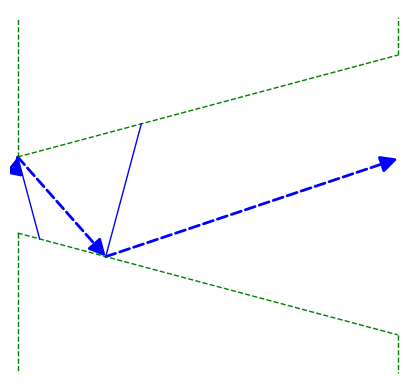

0

In [21]:
plt, n = integrand_out (alpha=pi/12, y = r-0.001, ang = pi/2-0.2)
plt.show(aspect_ratio = 1, axes=False)

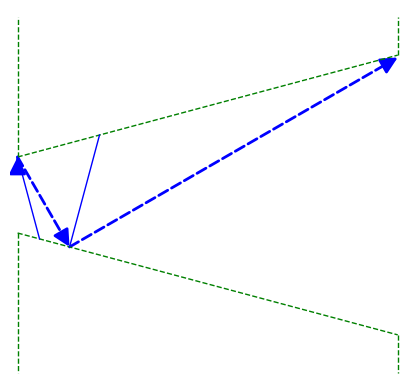

0

In [17]:
plt, n = integrand_out (alpha=pi/12, y = r-0.0001, ang = pi/2-0.0001)
plt.show(aspect_ratio = 1, axes=False)

In [18]:
plt, n = integrand_out (alpha=pi/16, y = r-0.0001, ang = pi/2-0.0001)
plt.show(aspect_ratio = 1, axes=False)

In [24]:
make_investigation_plots = True
frames = []

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)


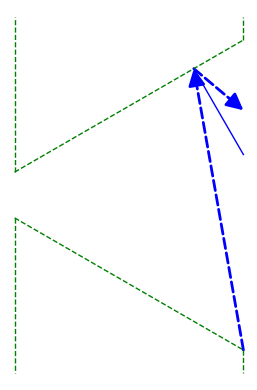

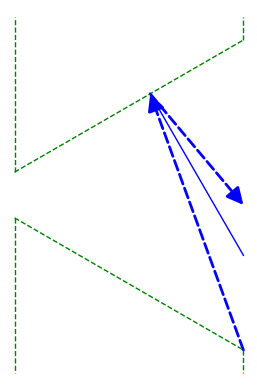

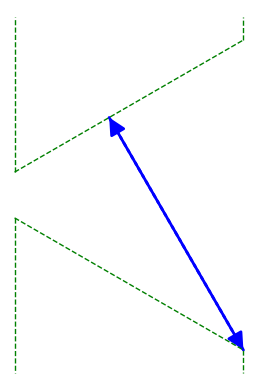

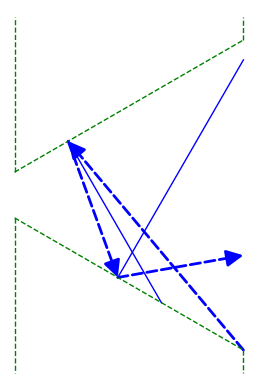

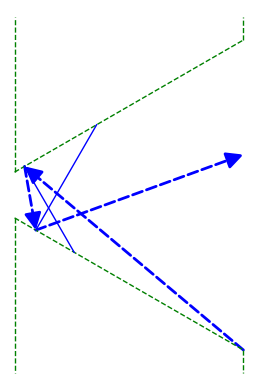

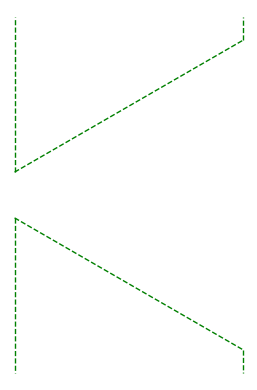

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134

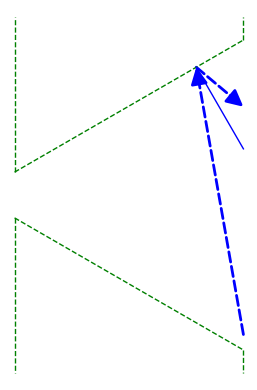

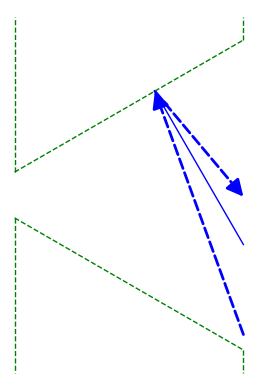

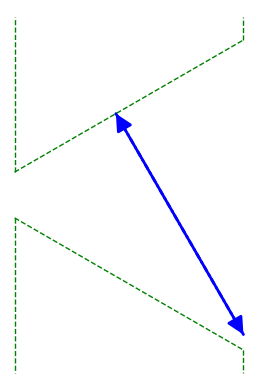

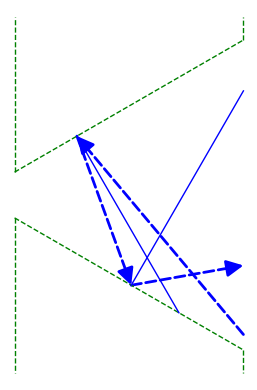

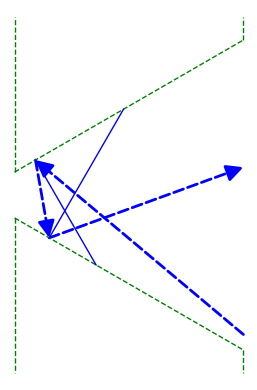

traj_ray.source Point2D(1, -609615242270663/1000000000000000)
intersection_point_in Point2D(1, -609615242270663/1000000000000000)


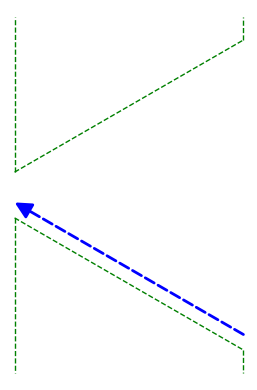

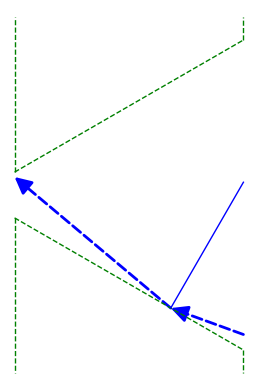

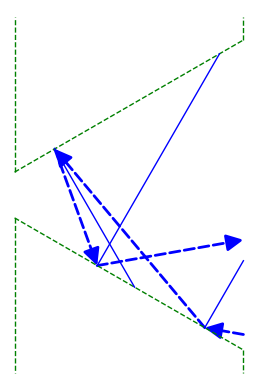

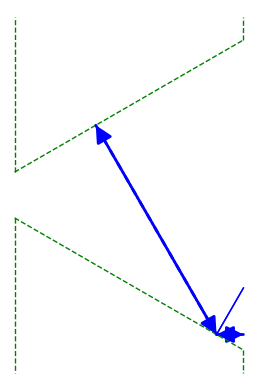

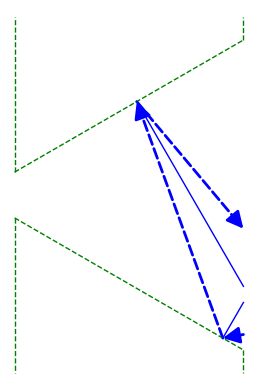

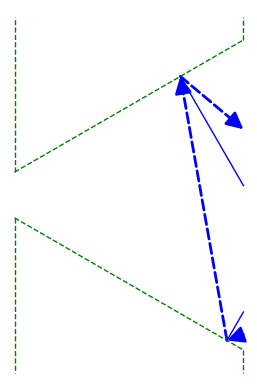

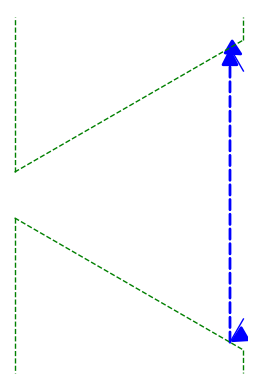

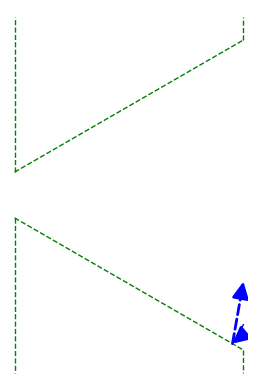

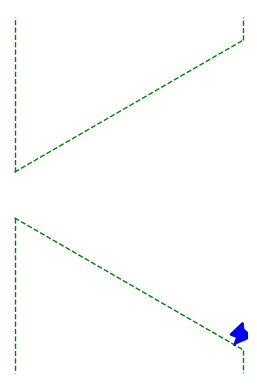

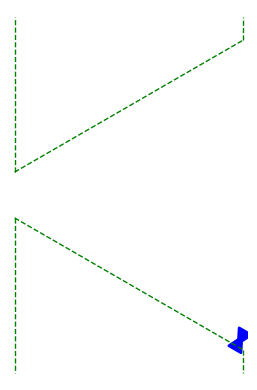

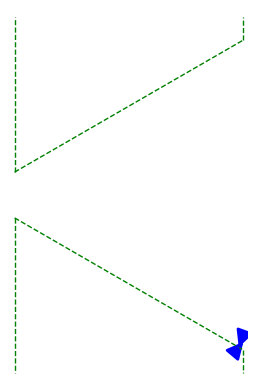

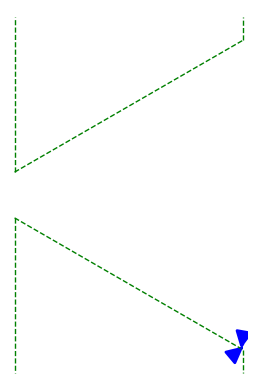

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -541880215351701/1000000000000000)
intersection_point_in Point2D(1, -541880215351701/1000000000000000)


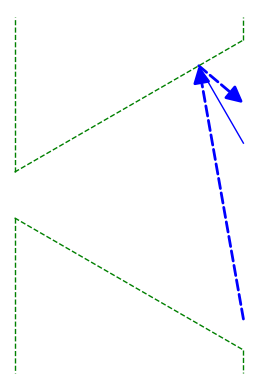

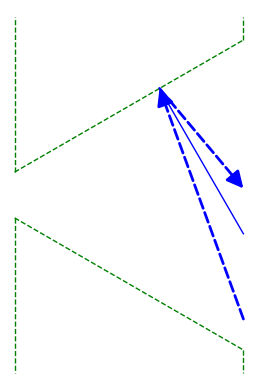

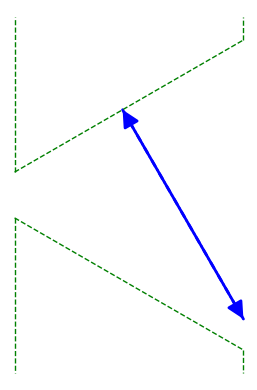

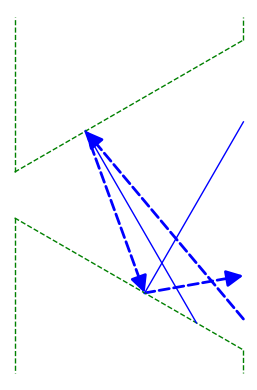

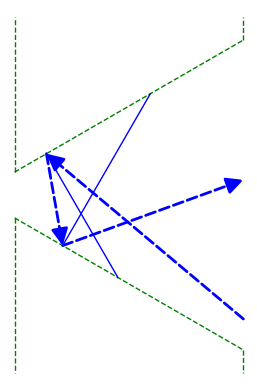

traj_ray.source Point2D(1, -541880215351701/1000000000000000)
intersection_point_in Point2D(1, -541880215351701/1000000000000000)


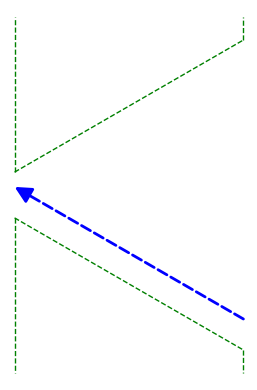

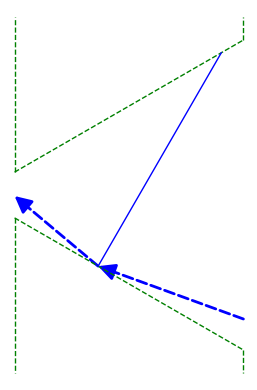

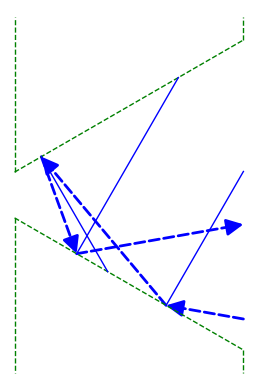

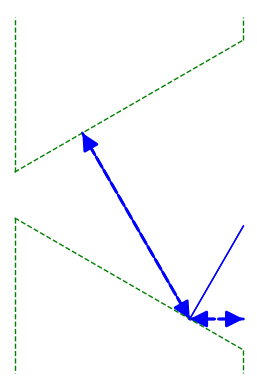

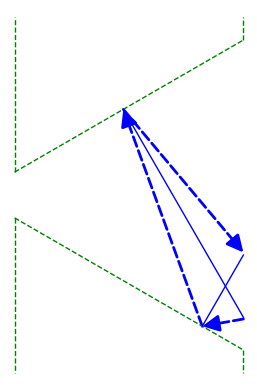

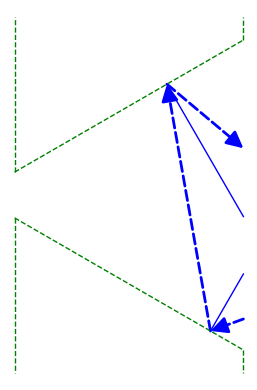

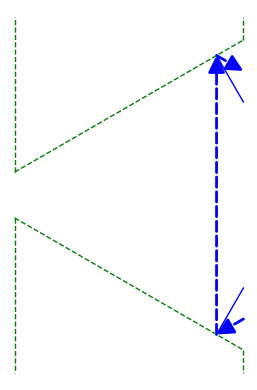

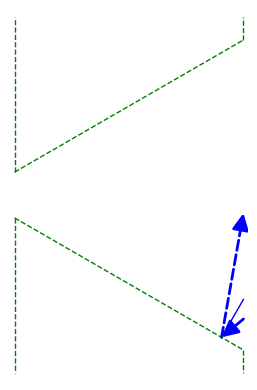

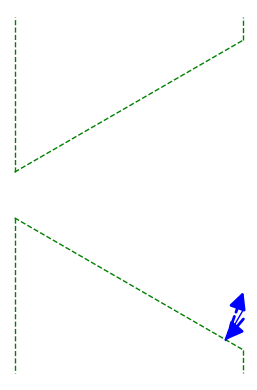

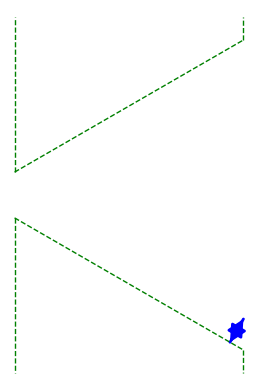

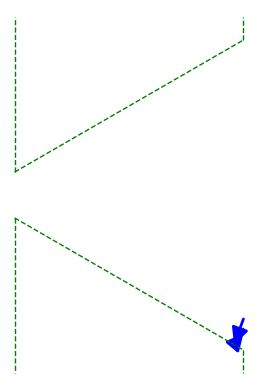

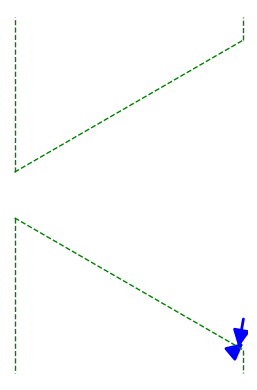

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -237072594216369/500000000000000)
intersection_point_in Point2D(1, -237072594216369/500000000000000)


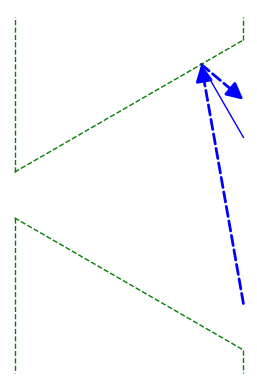

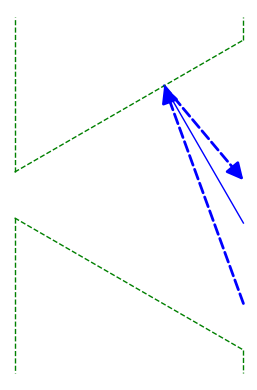

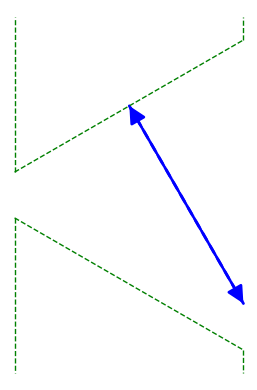

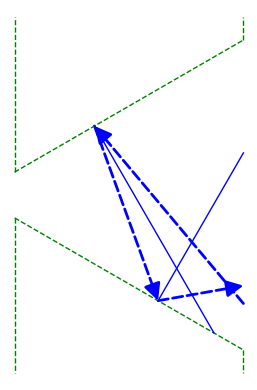

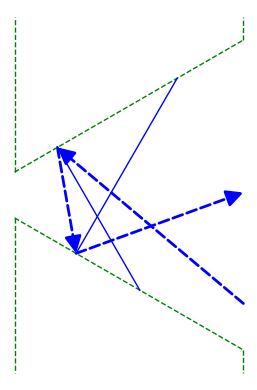

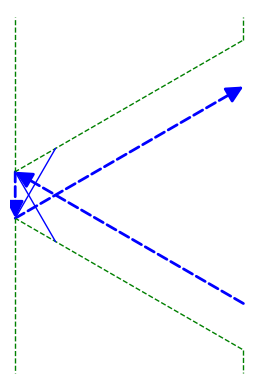

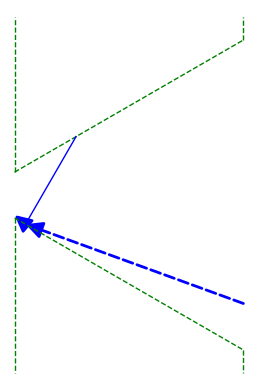

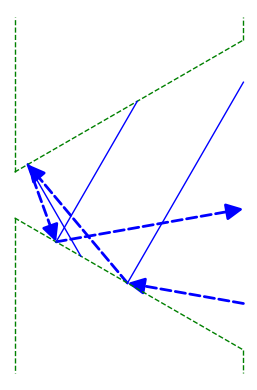

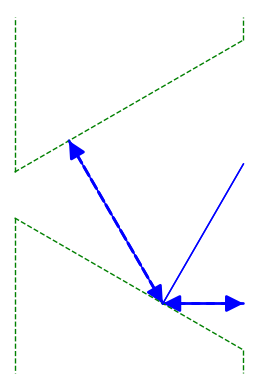

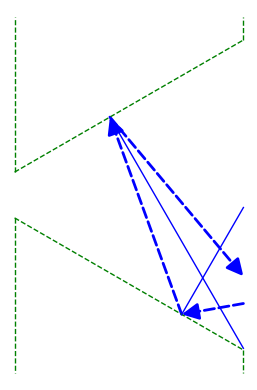

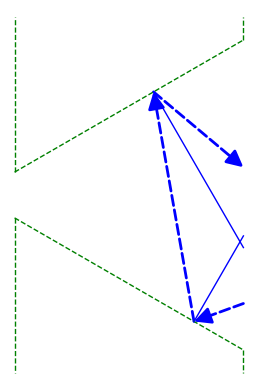

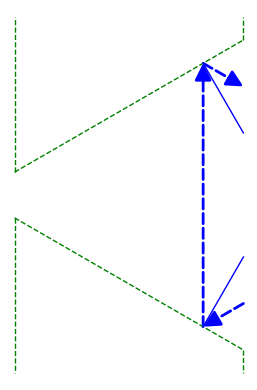

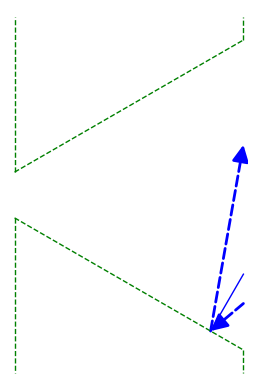

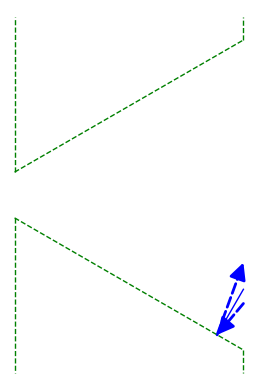

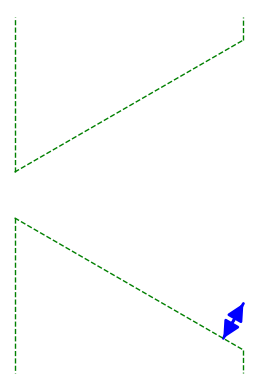

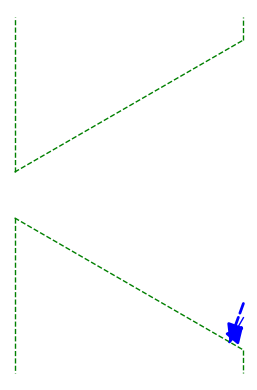

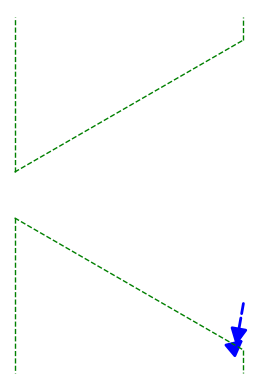

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -16256406460551/40000000000000)
intersection_point_in Point2D(1, -16256406460551/40000000000000)


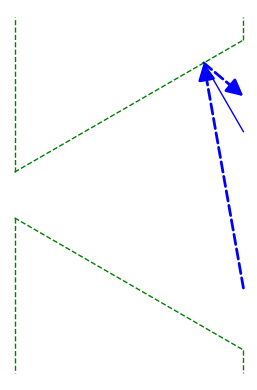

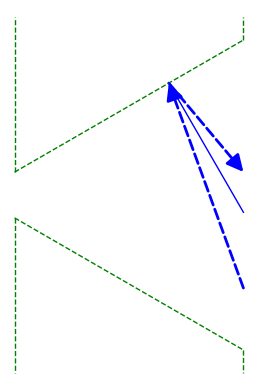

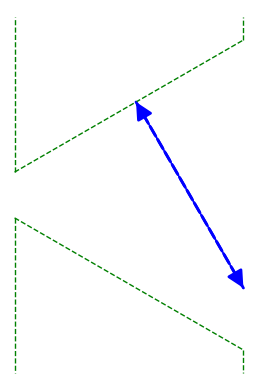

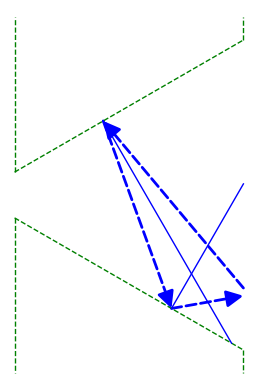

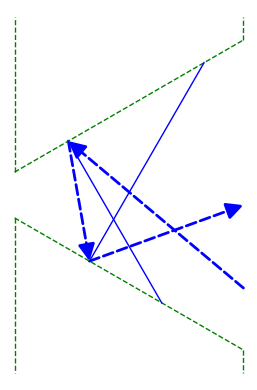

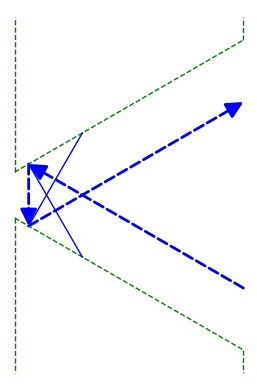

traj_ray.source Point2D(1, -16256406460551/40000000000000)
intersection_point_in Point2D(1, -16256406460551/40000000000000)


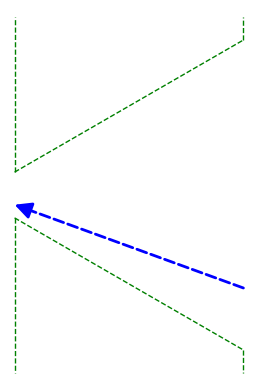

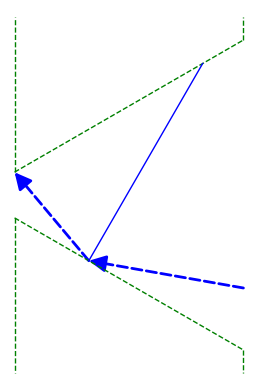

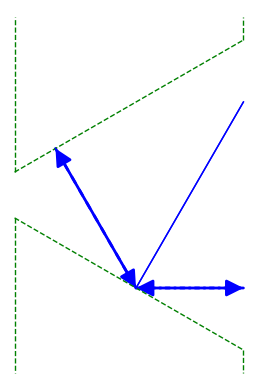

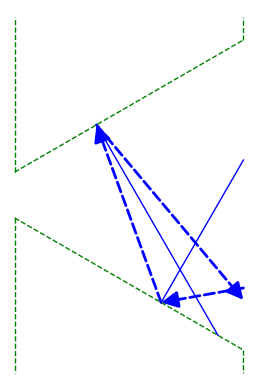

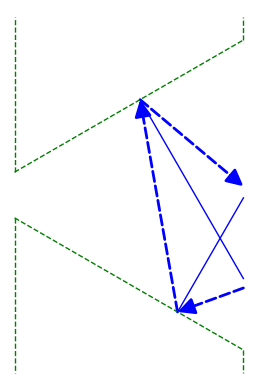

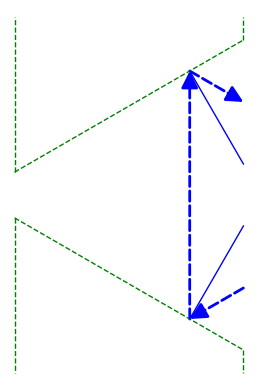

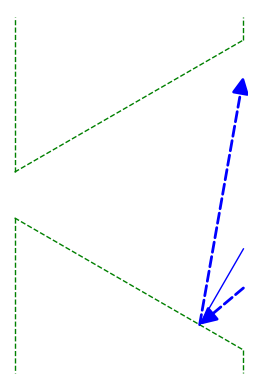

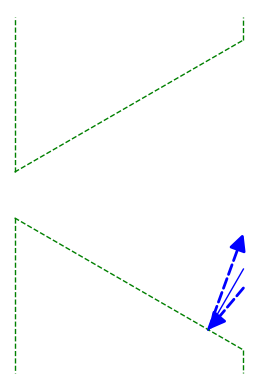

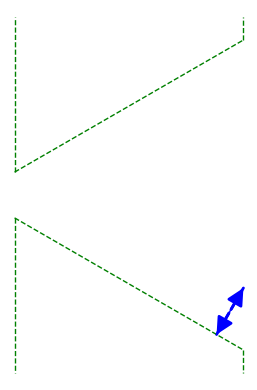

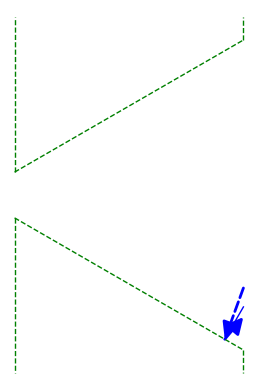

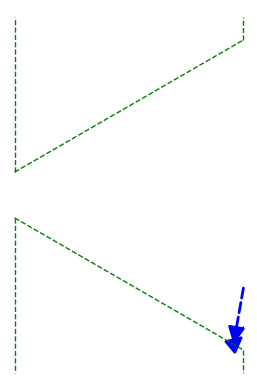

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -338675134594813/1000000000000000)
intersection_point_in Point2D(1, -338675134594813/1000000000000000)


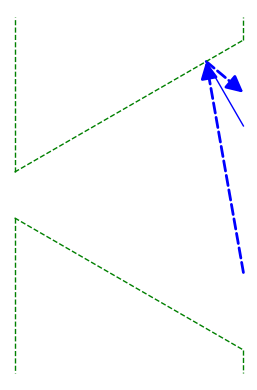

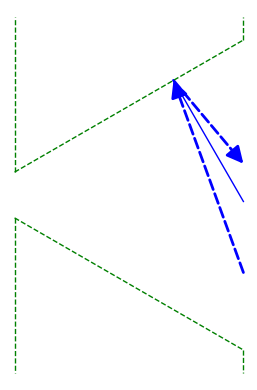

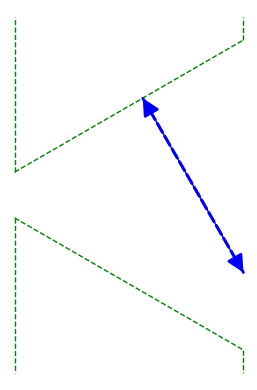

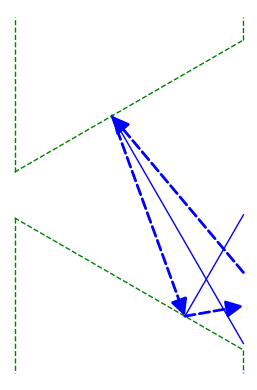

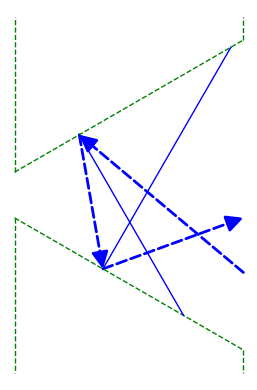

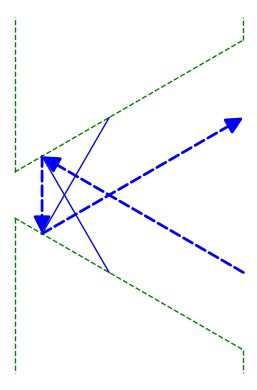

traj_ray.source Point2D(1, -338675134594813/1000000000000000)
intersection_point_in Point2D(1, -338675134594813/1000000000000000)


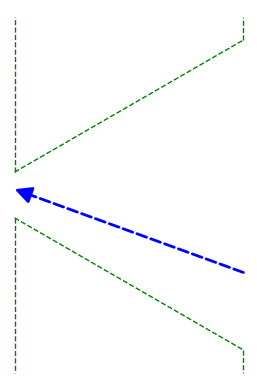

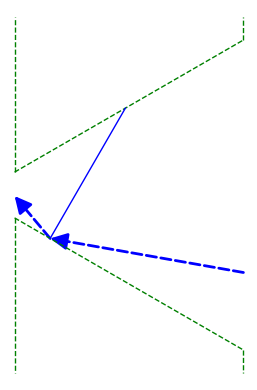

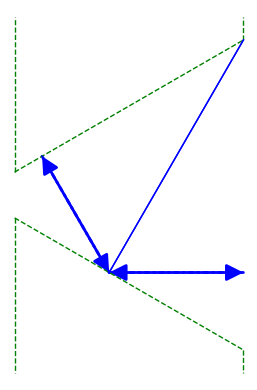

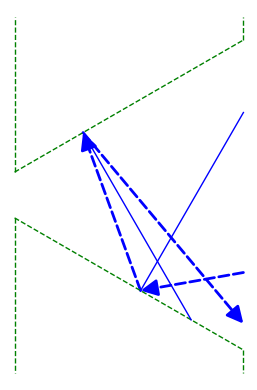

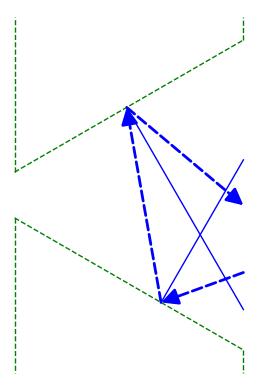

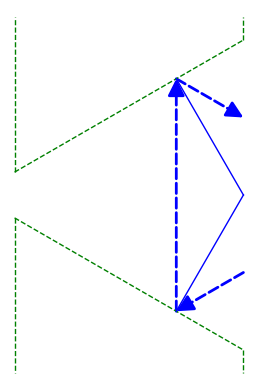

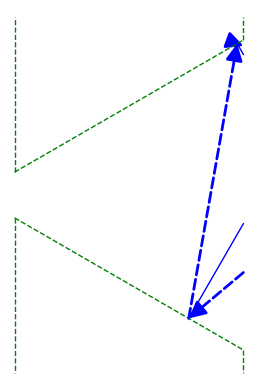

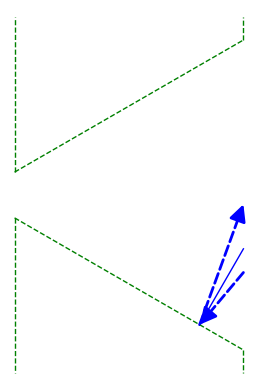

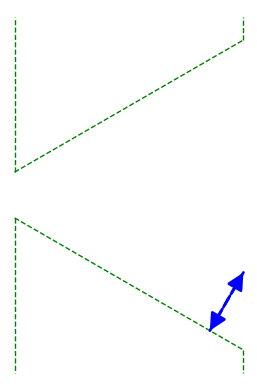

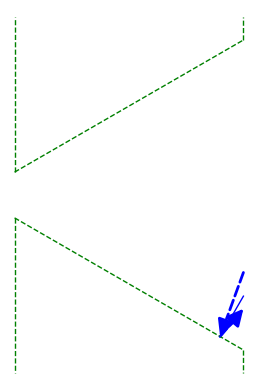

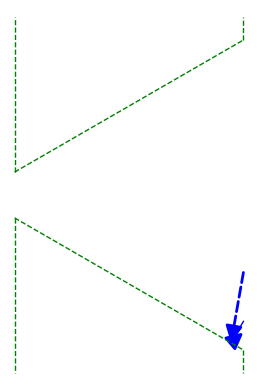

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -5418802153517/20000000000000)
intersection_point_in Point2D(1, -5418802153517/20000000000000)


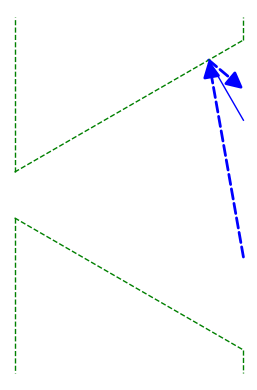

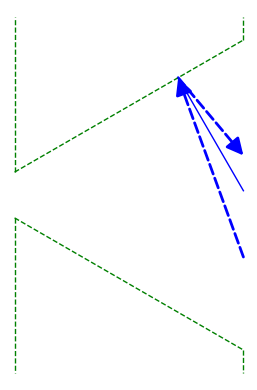

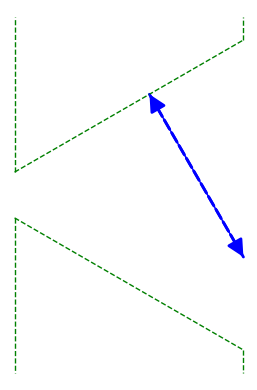

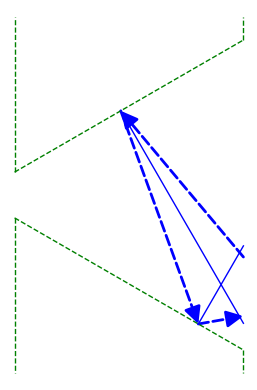

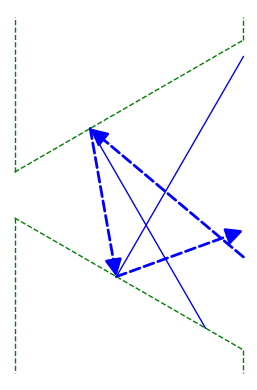

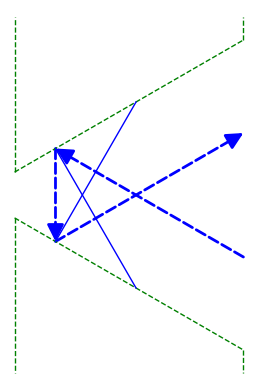

traj_ray.source Point2D(1, -5418802153517/20000000000000)
intersection_point_in Point2D(1, -5418802153517/20000000000000)


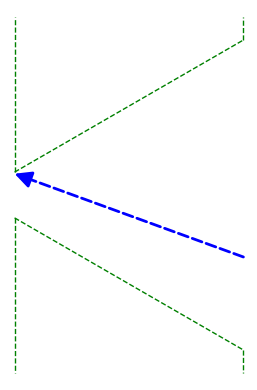

traj_ray.source Point2D(1, -5418802153517/20000000000000)
intersection_point_in Point2D(1, -5418802153517/20000000000000)


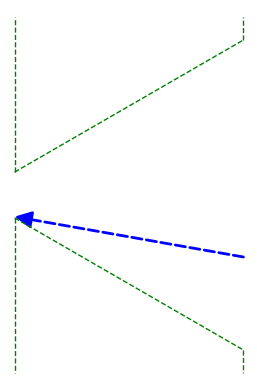

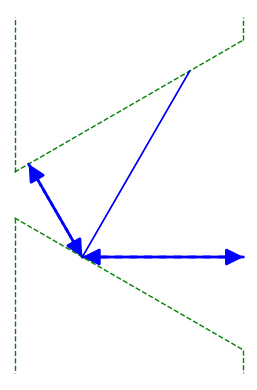

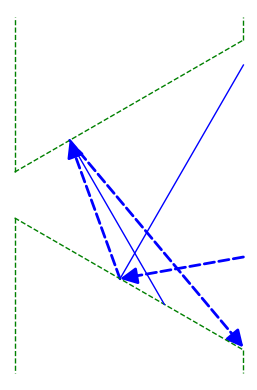

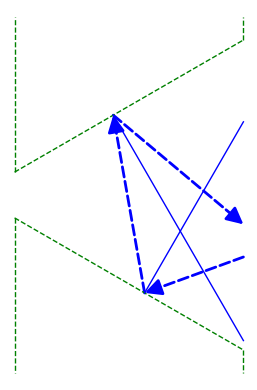

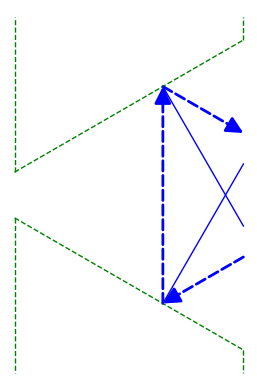

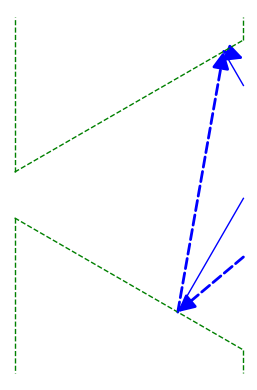

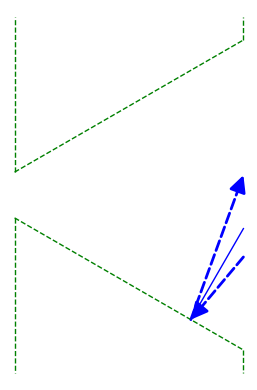

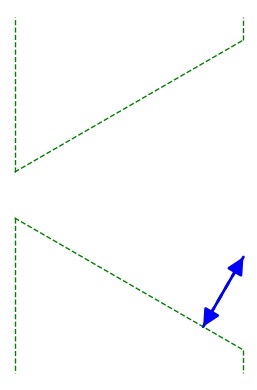

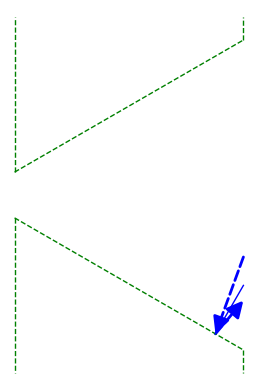

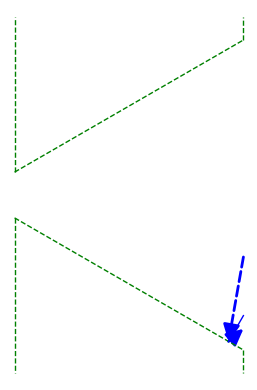

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -25400635094611/125000000000000)
intersection_point_in Point2D(1, -25400635094611/125000000000000)


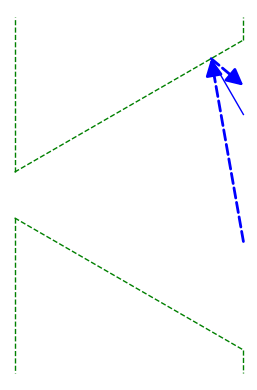

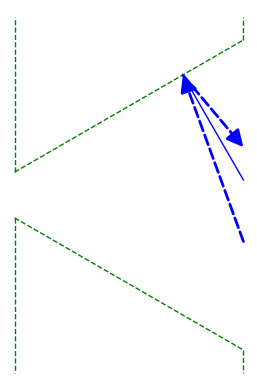

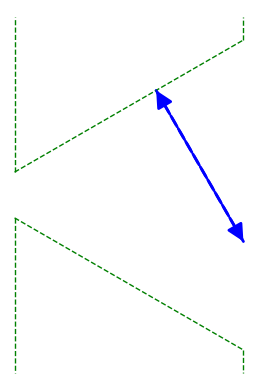

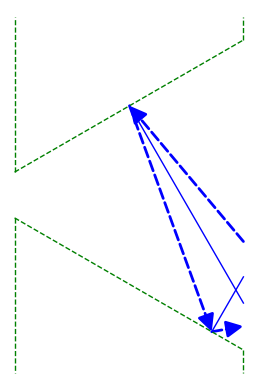

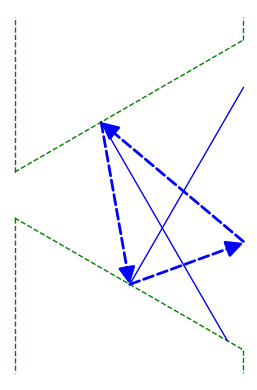

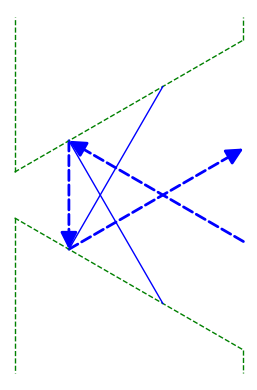

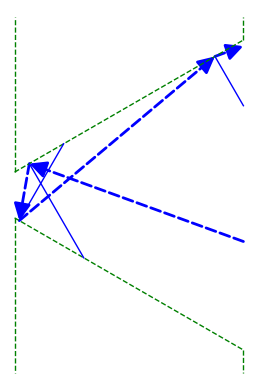

traj_ray.source Point2D(1, -25400635094611/125000000000000)
intersection_point_in Point2D(1, -25400635094611/125000000000000)


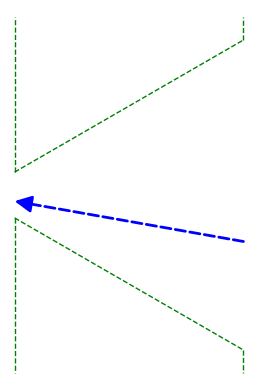

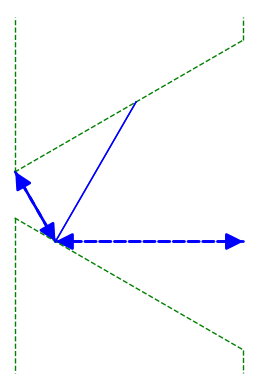

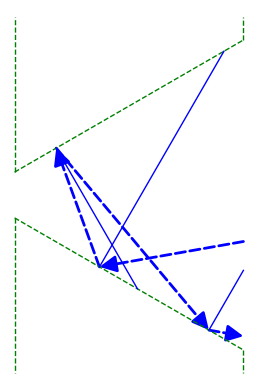

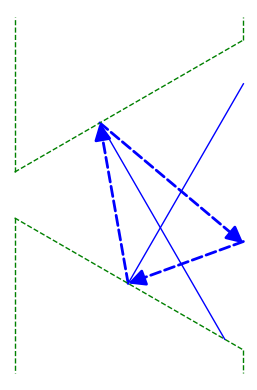

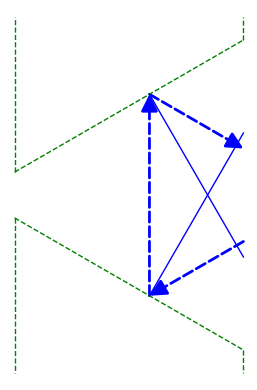

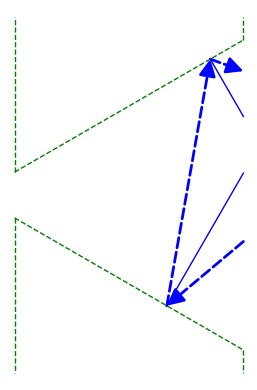

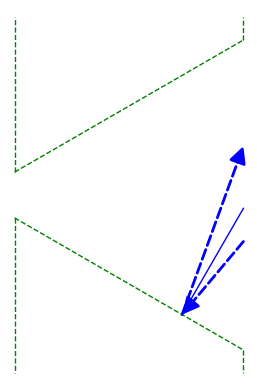

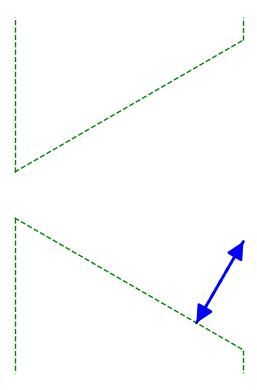

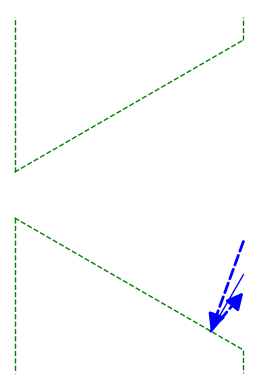

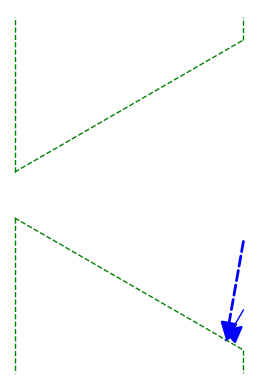

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -5418802153517/40000000000000)
intersection_point_in Point2D(1, -5418802153517/40000000000000)


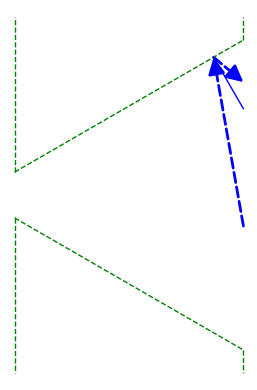

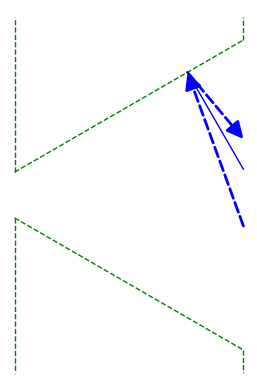

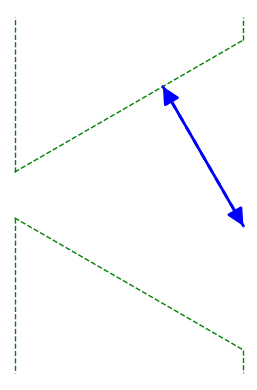

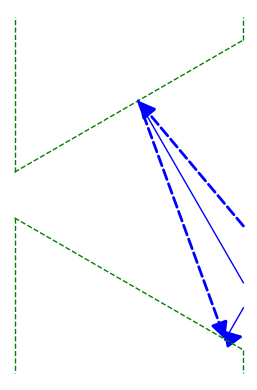

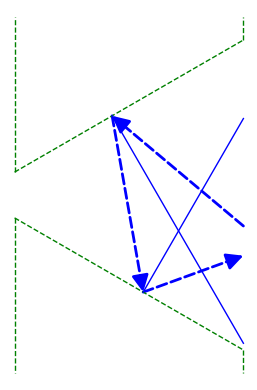

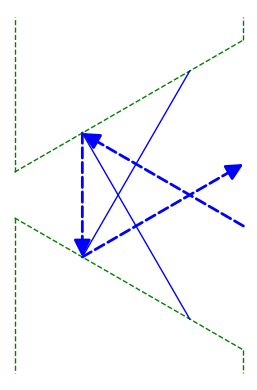

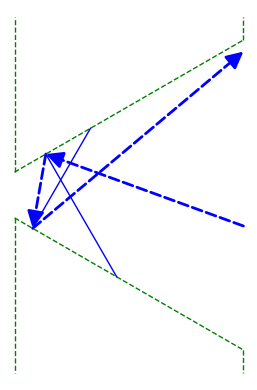

traj_ray.source Point2D(1, -5418802153517/40000000000000)
intersection_point_in Point2D(1, -5418802153517/40000000000000)


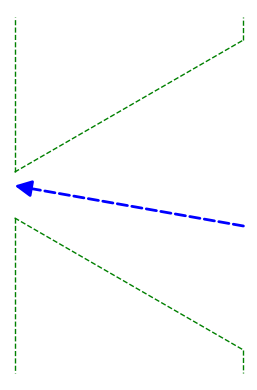

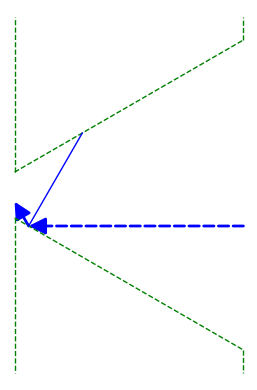

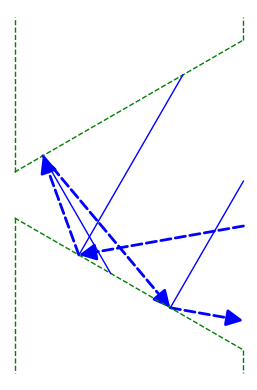

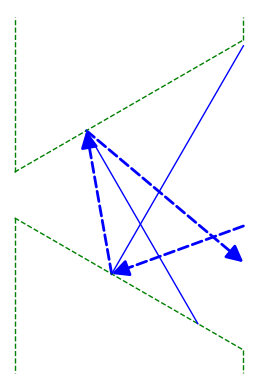

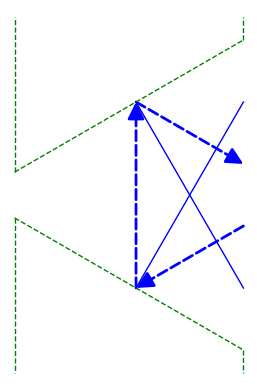

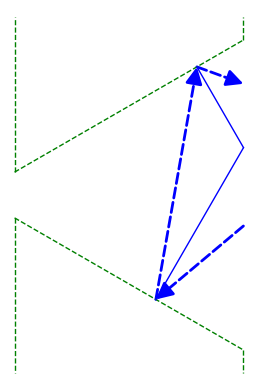

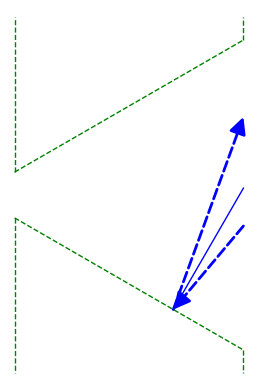

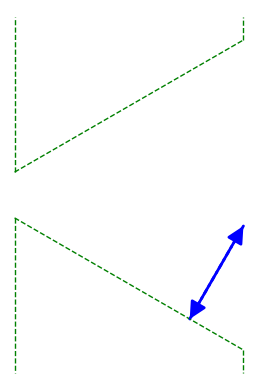

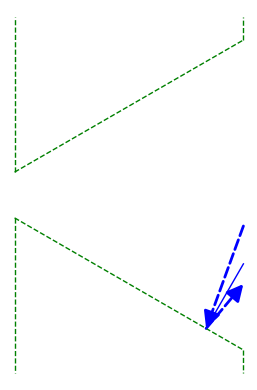

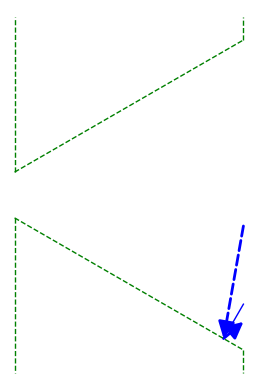

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, -5418802153517/80000000000000)
intersection_point_in Point2D(1, -5418802153517/80000000000000)


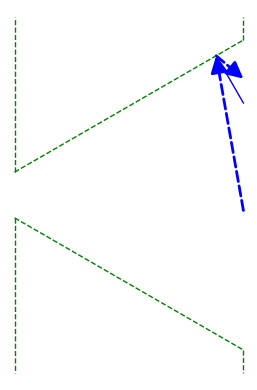

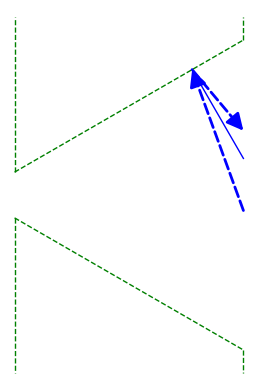

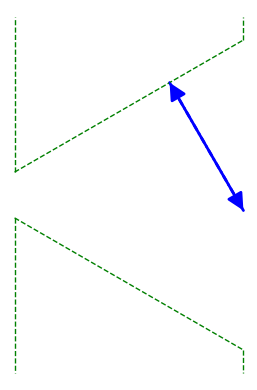

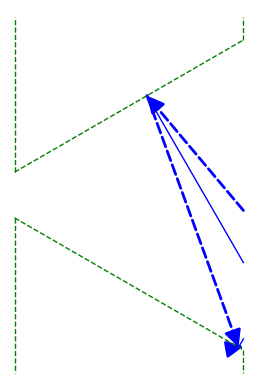

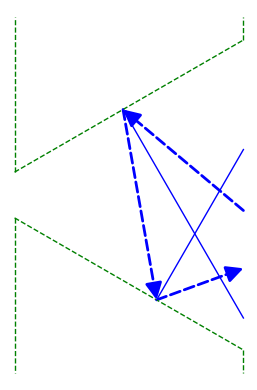

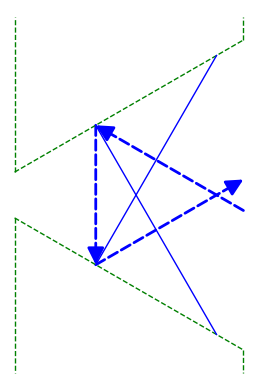

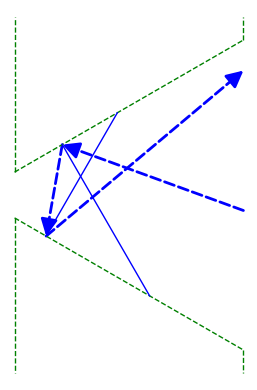

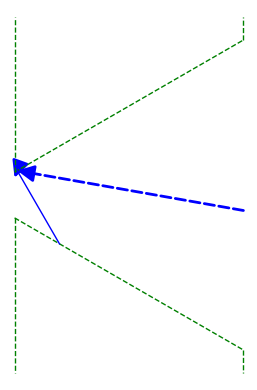

traj_ray.source Point2D(1, -5418802153517/80000000000000)
intersection_point_in Point2D(1, -5418802153517/80000000000000)


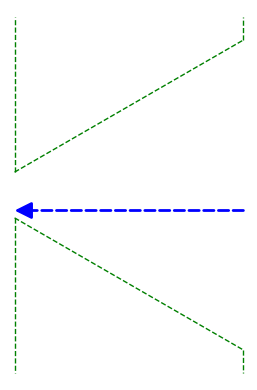

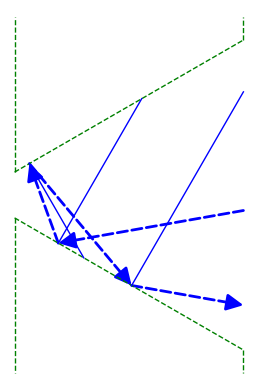

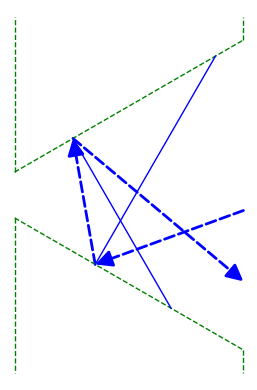

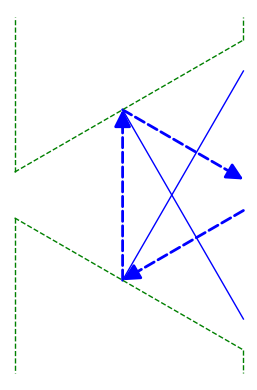

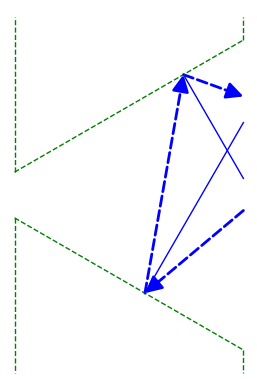

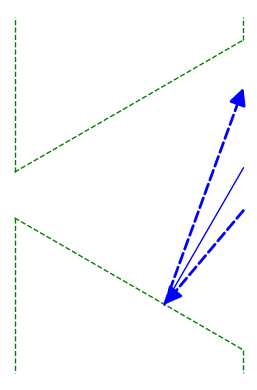

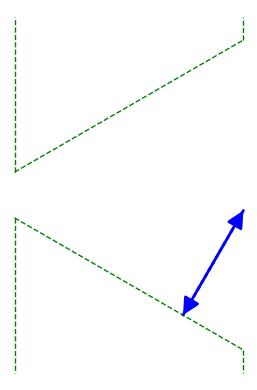

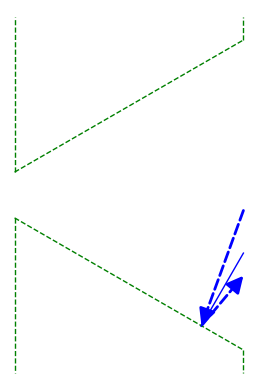

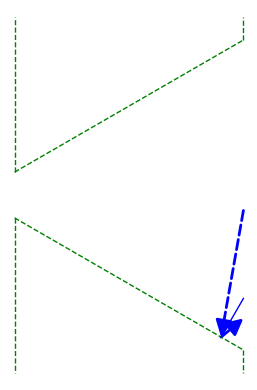

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, 27755575615629/250000000000000000000000000000)
intersection_point_in Point2D(1, 27755575615629/250000000000000000000000000000)


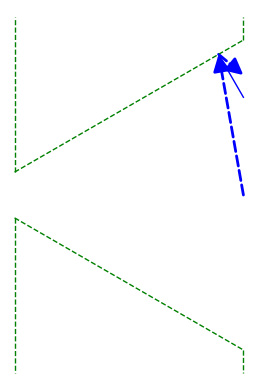

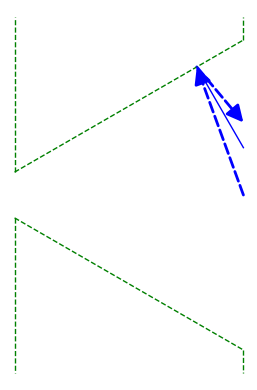

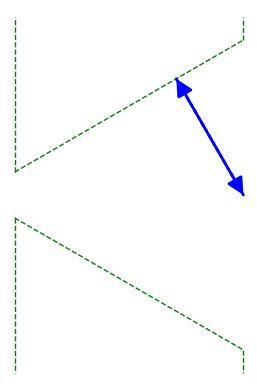

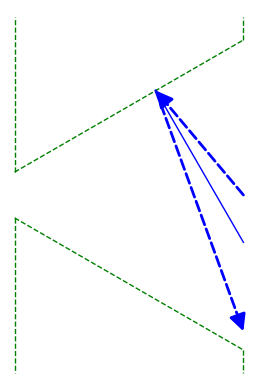

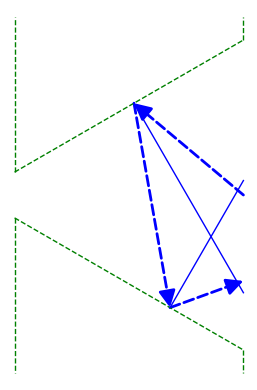

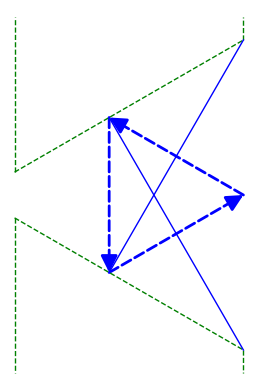

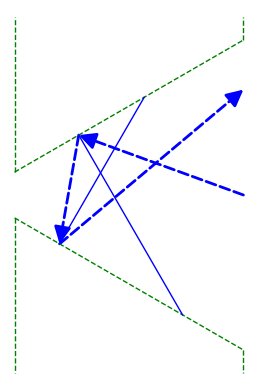

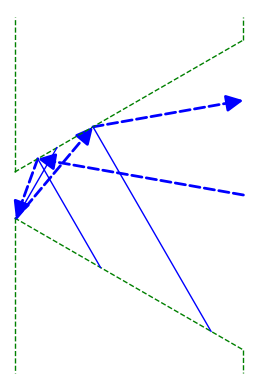

traj_ray.source Point2D(1, 27755575615629/250000000000000000000000000000)
intersection_point_in Point2D(1, 27755575615629/250000000000000000000000000000)


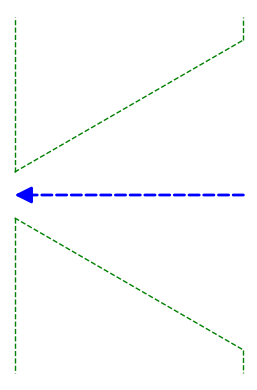

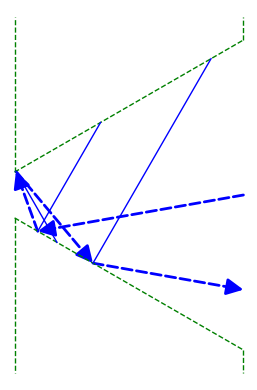

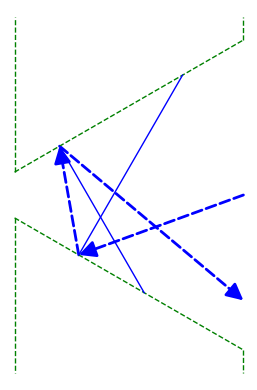

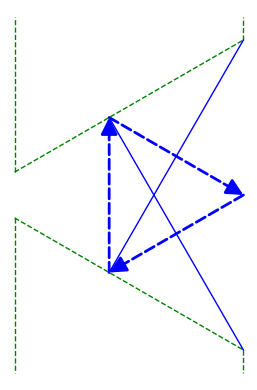

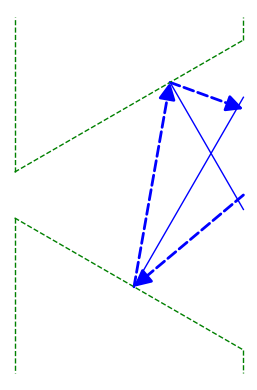

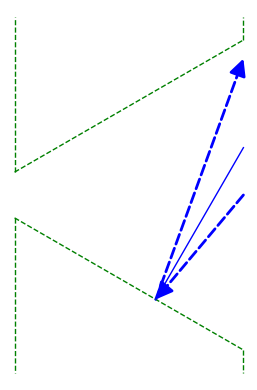

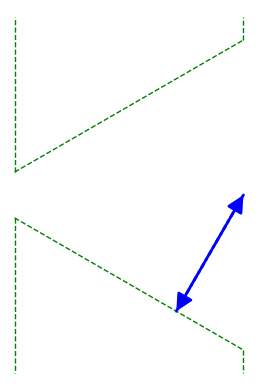

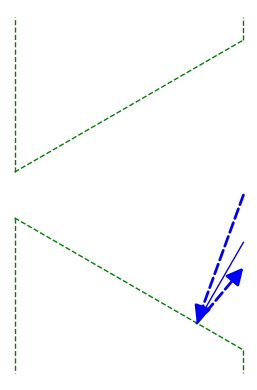

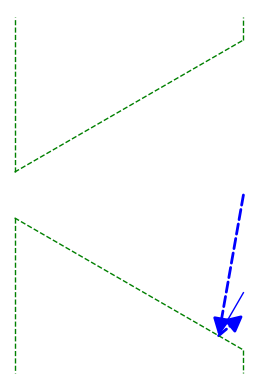

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, 338675134594813/5000000000000000)
intersection_point_in Point2D(1, 338675134594813/5000000000000000)


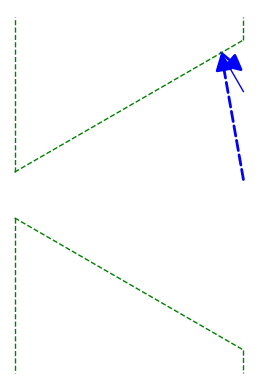

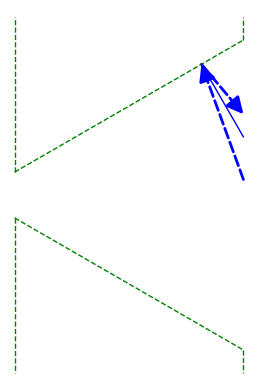

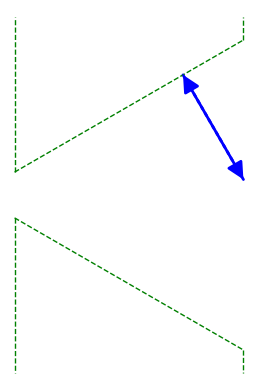

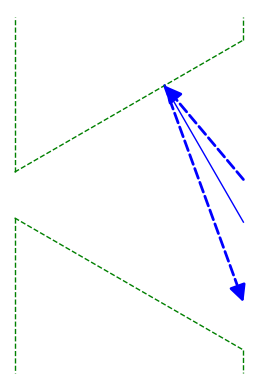

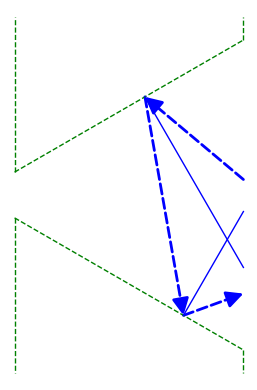

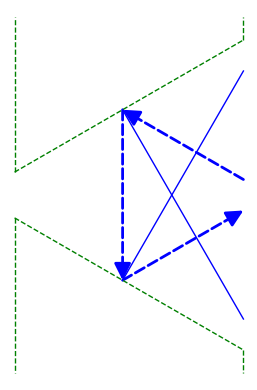

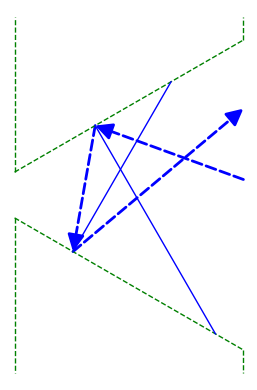

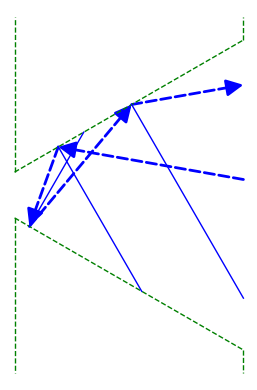

traj_ray.source Point2D(1, 338675134594813/5000000000000000)
intersection_point_in Point2D(1, 338675134594813/5000000000000000)


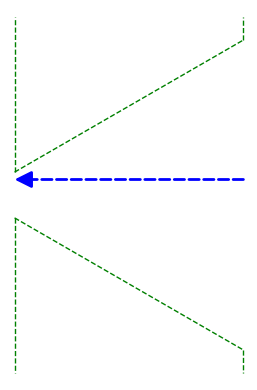

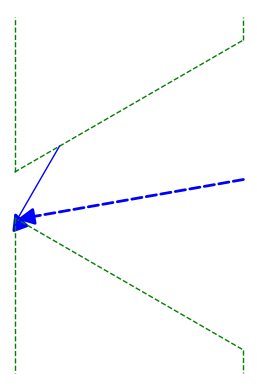

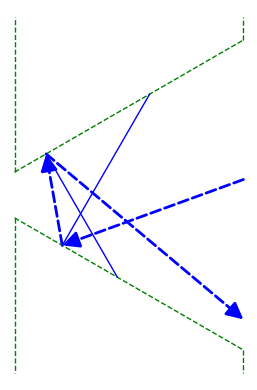

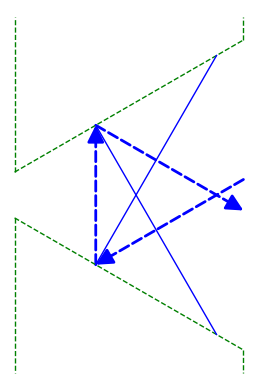

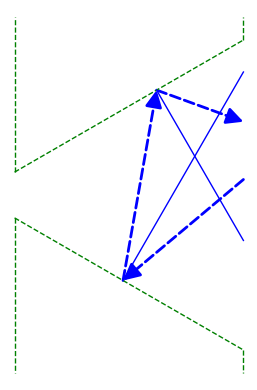

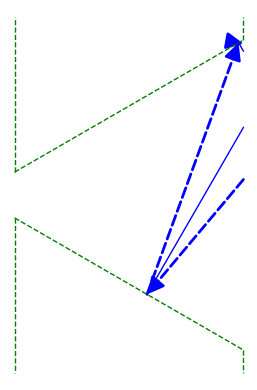

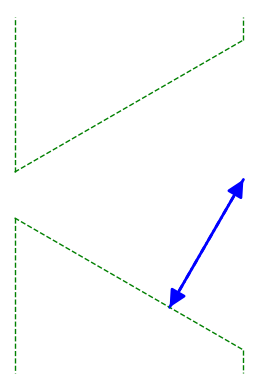

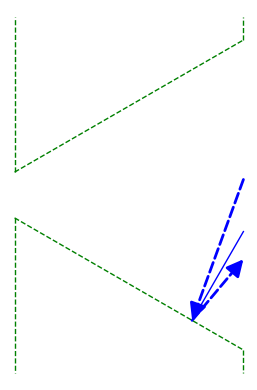

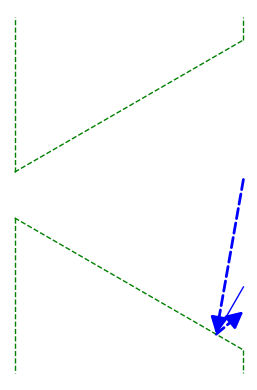

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, 5418802153517/40000000000000)
intersection_point_in Point2D(1, 5418802153517/40000000000000)


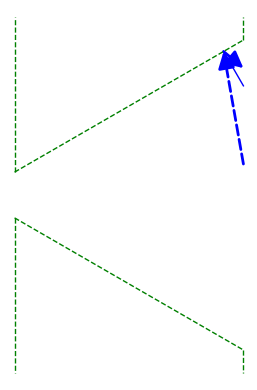

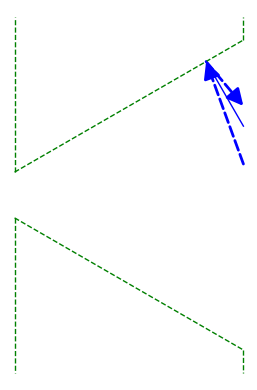

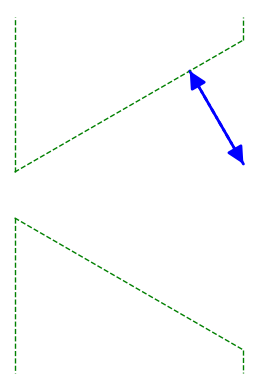

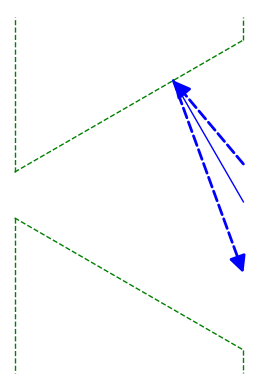

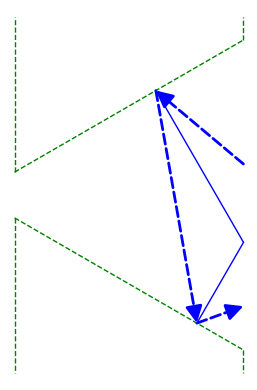

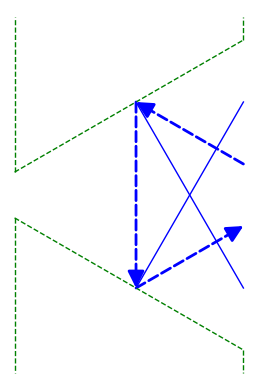

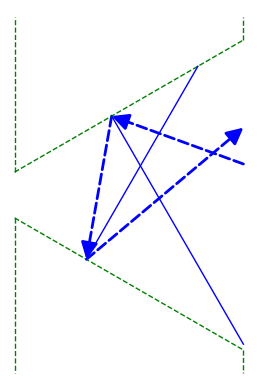

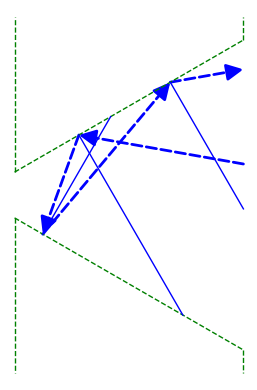

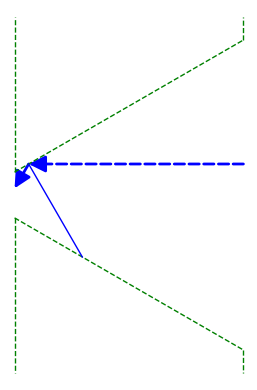

traj_ray.source Point2D(1, 5418802153517/40000000000000)
intersection_point_in Point2D(1, 5418802153517/40000000000000)


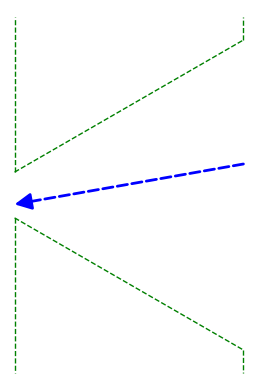

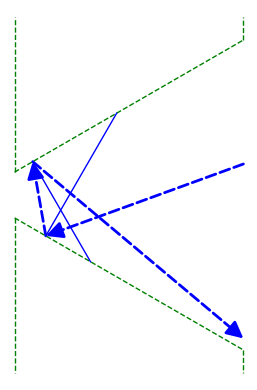

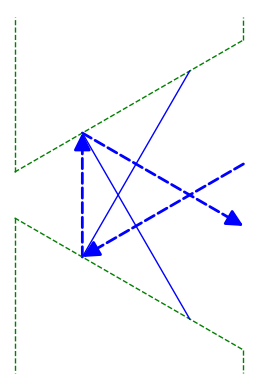

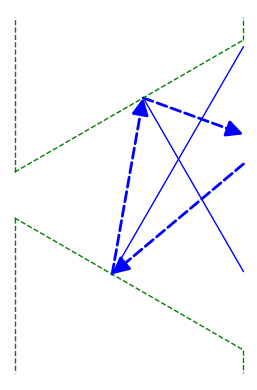

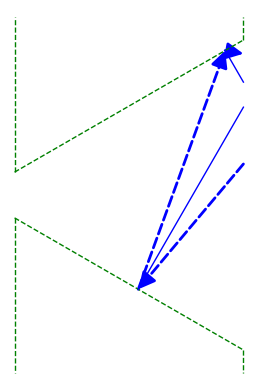

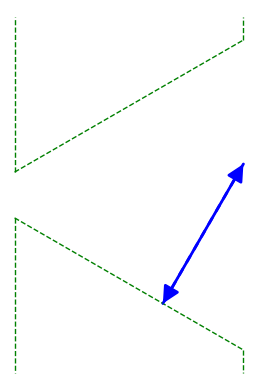

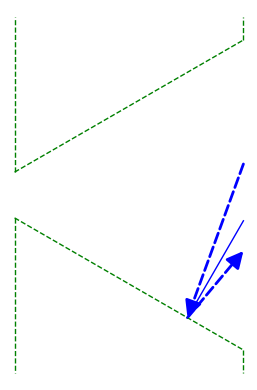

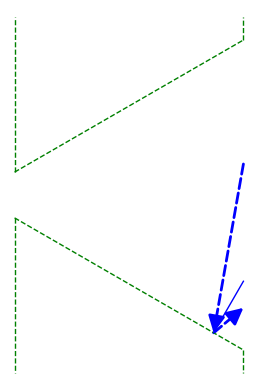

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, 25400635094611/125000000000000)
intersection_point_in Point2D(1, 25400635094611/125000000000000)


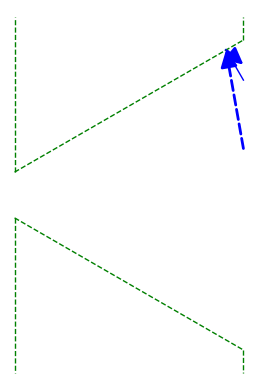

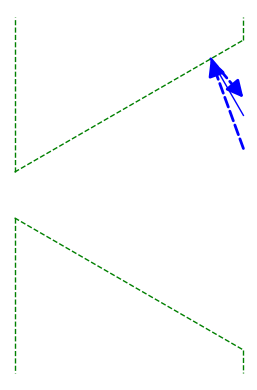

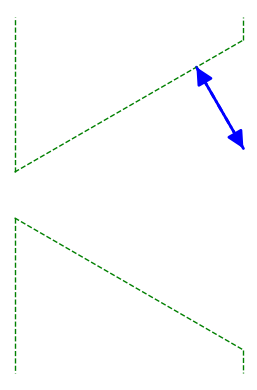

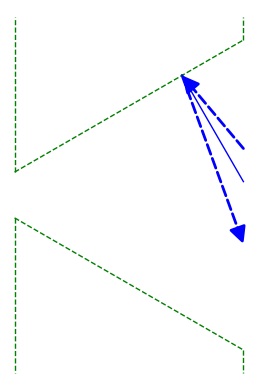

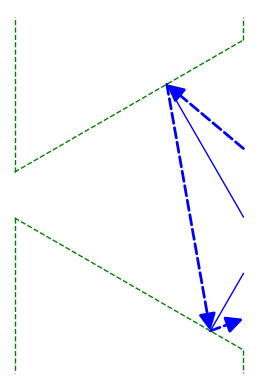

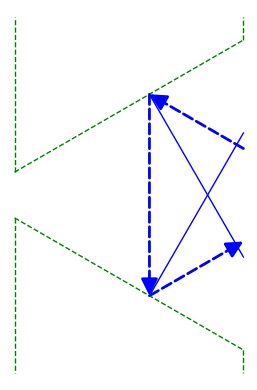

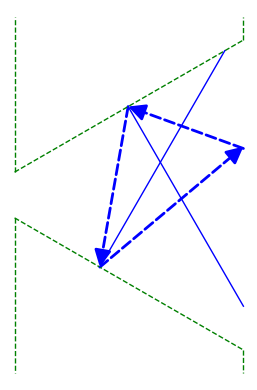

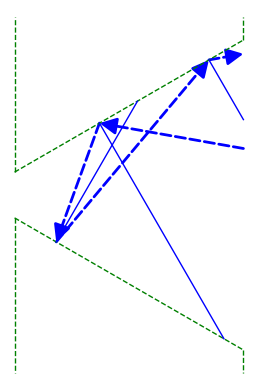

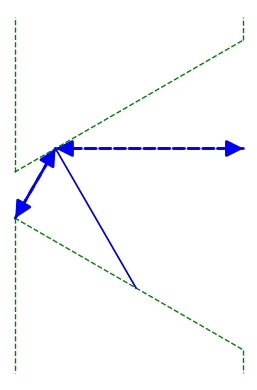

traj_ray.source Point2D(1, 25400635094611/125000000000000)
intersection_point_in Point2D(1, 25400635094611/125000000000000)


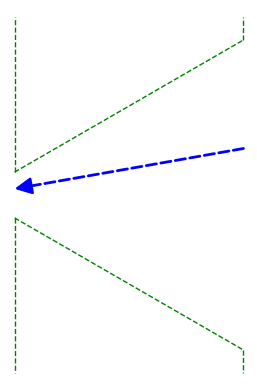

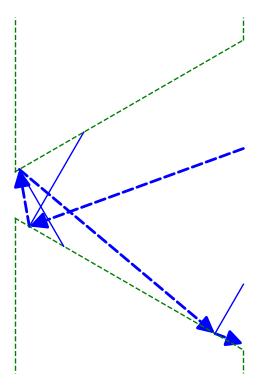

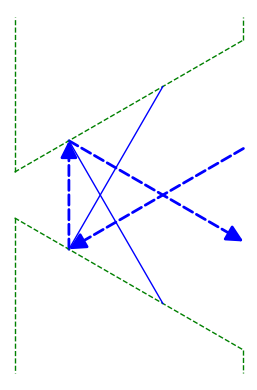

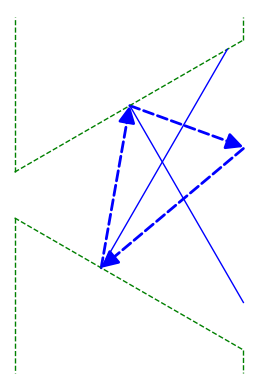

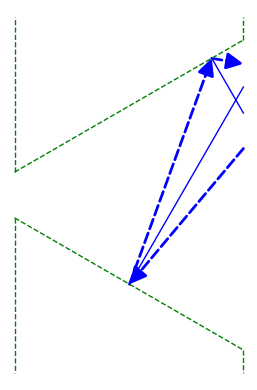

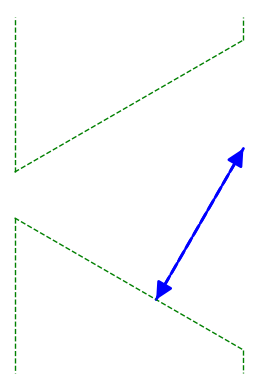

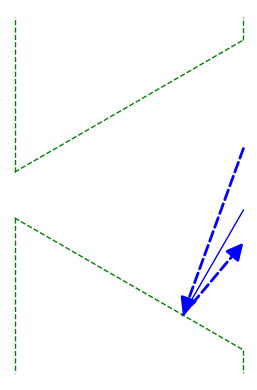

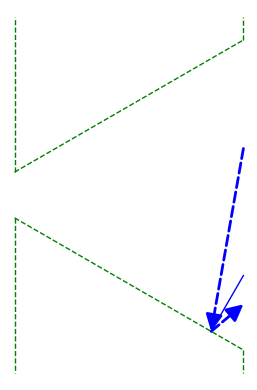

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, 5418802153517/20000000000000)
intersection_point_in Point2D(1, 5418802153517/20000000000000)


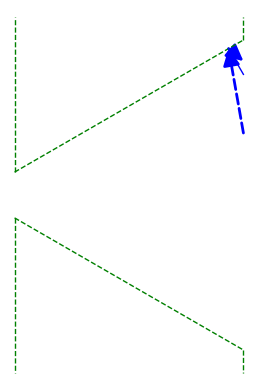

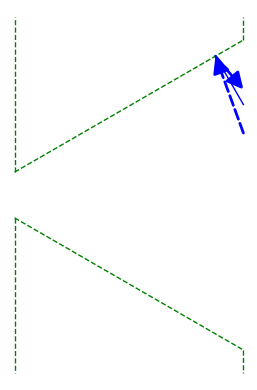

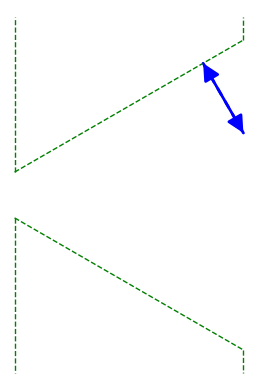

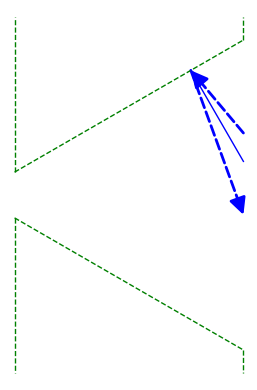

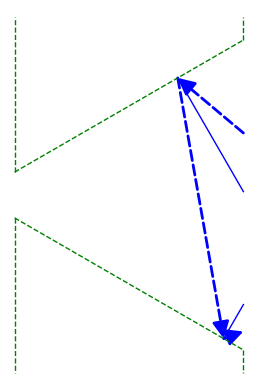

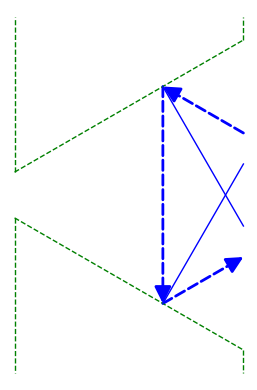

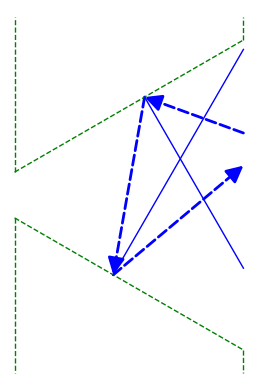

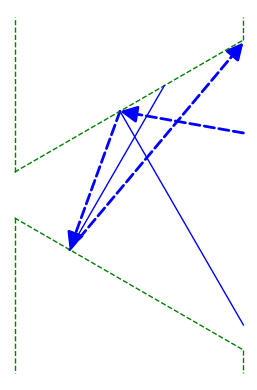

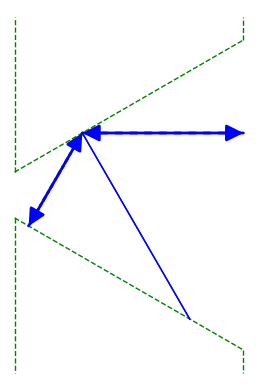

traj_ray.source Point2D(1, 5418802153517/20000000000000)
intersection_point_in Point2D(1, 5418802153517/20000000000000)


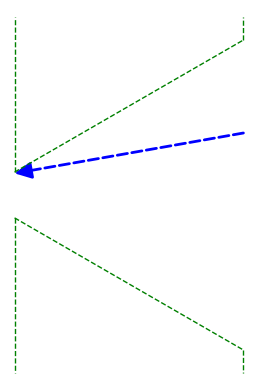

traj_ray.source Point2D(1, 5418802153517/20000000000000)
intersection_point_in Point2D(1, 5418802153517/20000000000000)


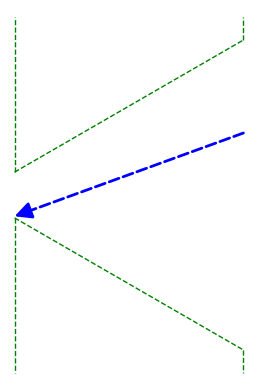

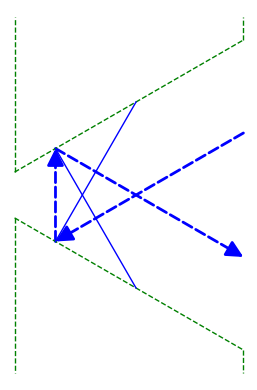

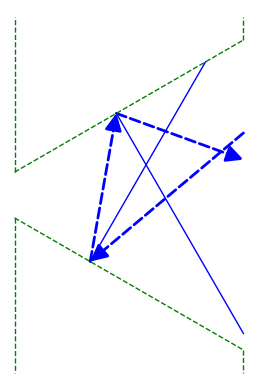

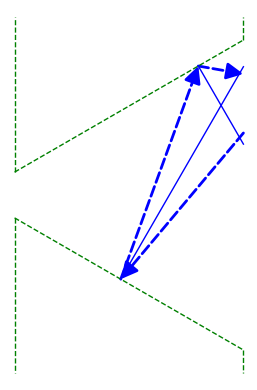

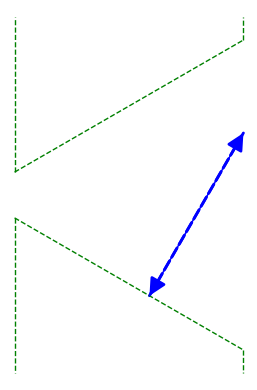

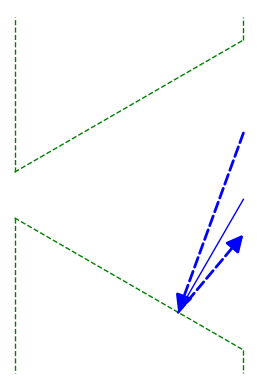

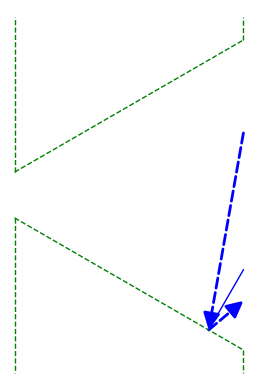

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, 338675134594813/1000000000000000)
intersection_point_in Point2D(1, 338675134594813/1000000000000000)


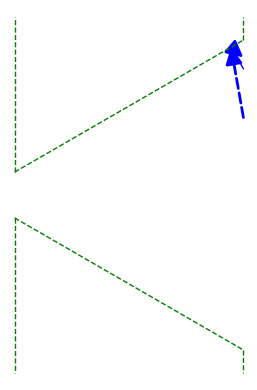

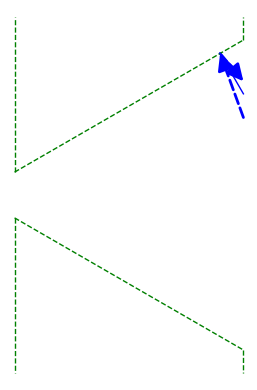

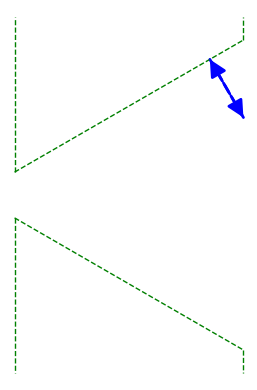

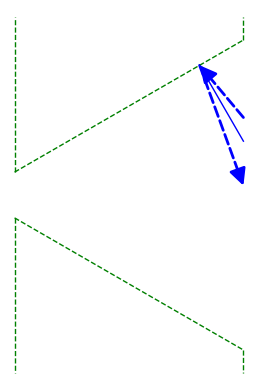

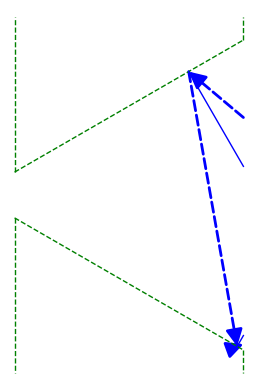

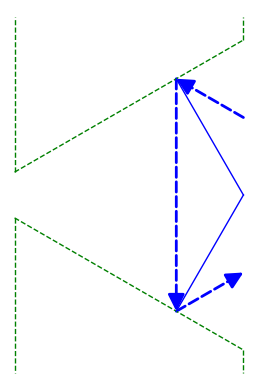

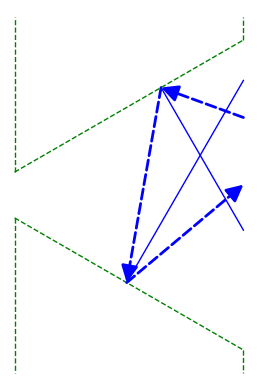

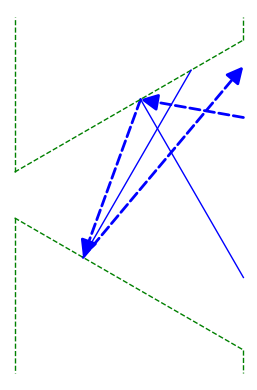

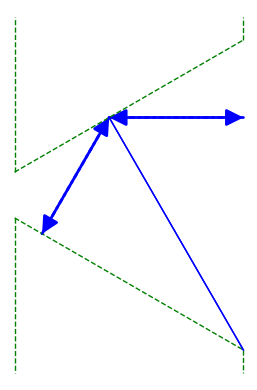

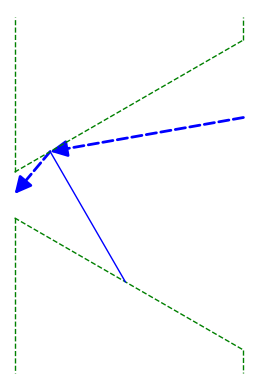

traj_ray.source Point2D(1, 338675134594813/1000000000000000)
intersection_point_in Point2D(1, 338675134594813/1000000000000000)


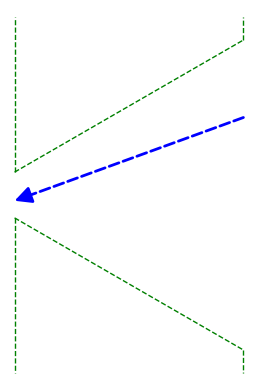

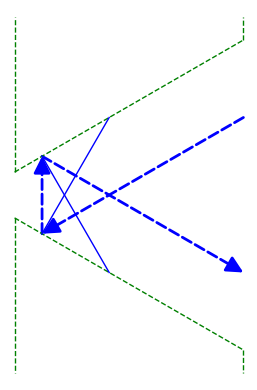

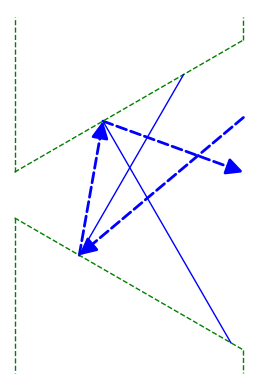

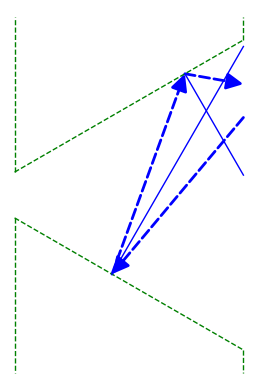

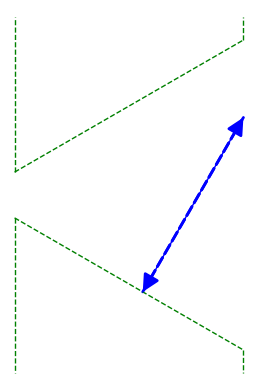

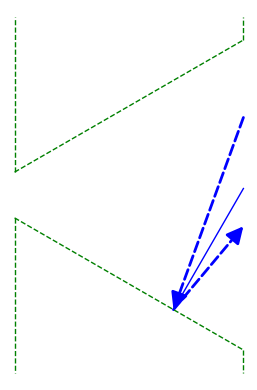

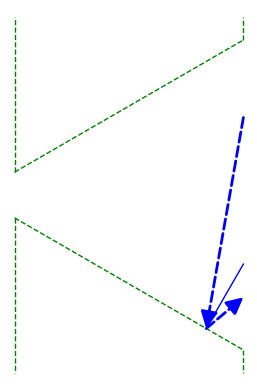

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, 25400635094611/62500000000000)
intersection_point_in Point2D(1, 25400635094611/62500000000000)


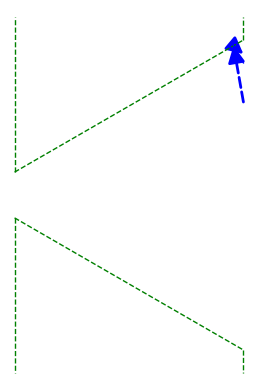

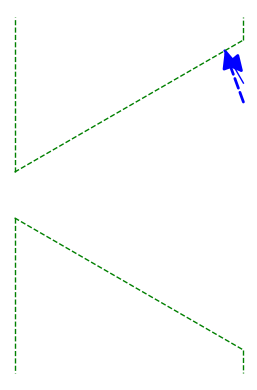

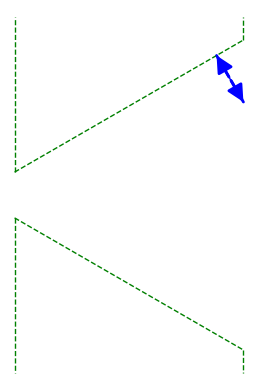

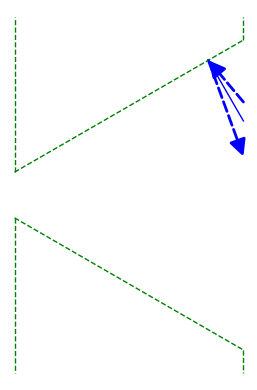

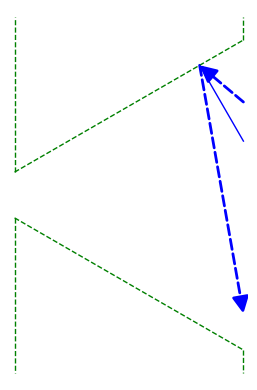

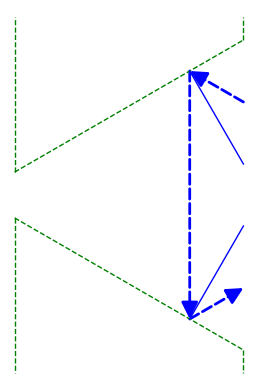

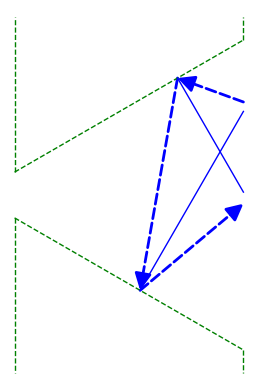

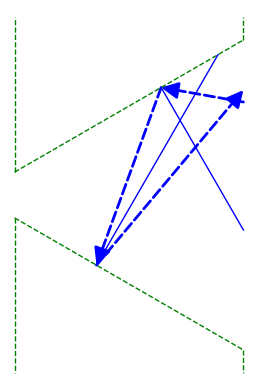

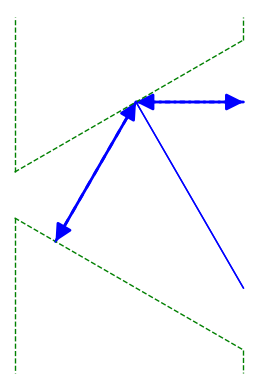

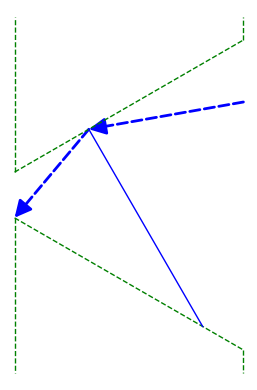

traj_ray.source Point2D(1, 25400635094611/62500000000000)
intersection_point_in Point2D(1, 25400635094611/62500000000000)


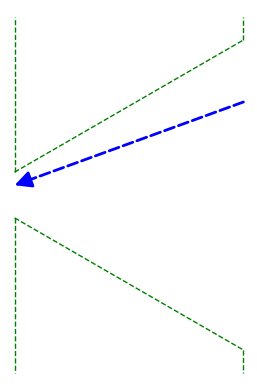

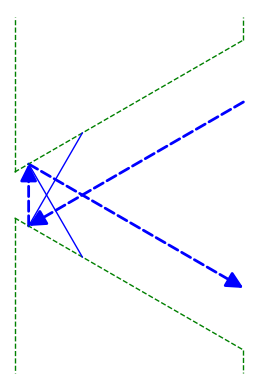

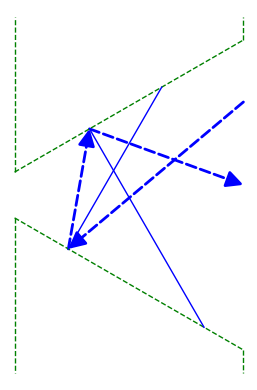

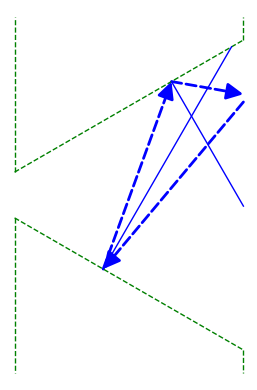

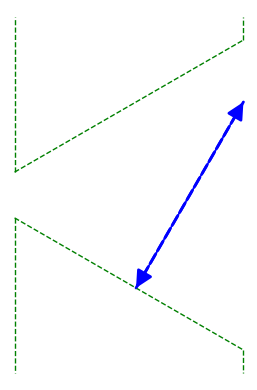

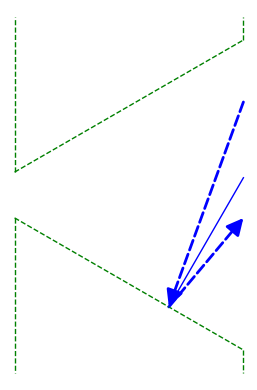

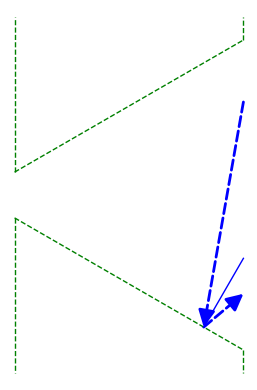

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, 237072594216369/500000000000000)
intersection_point_in Point2D(1, 237072594216369/500000000000000)


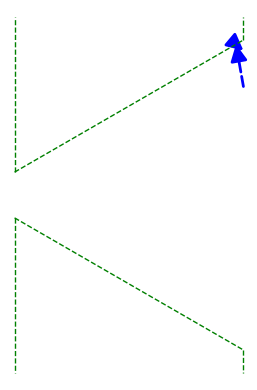

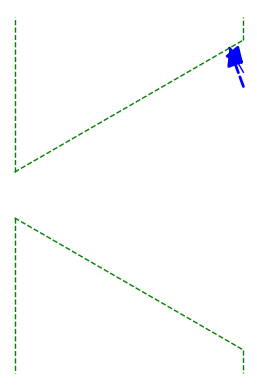

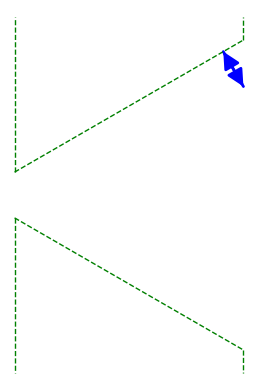

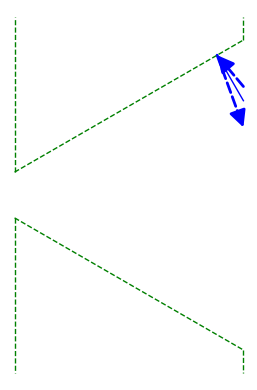

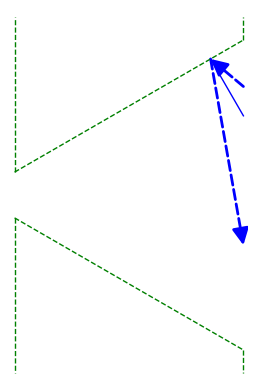

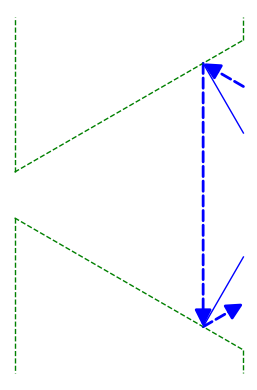

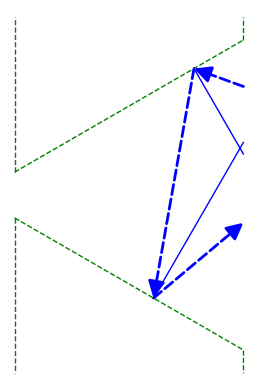

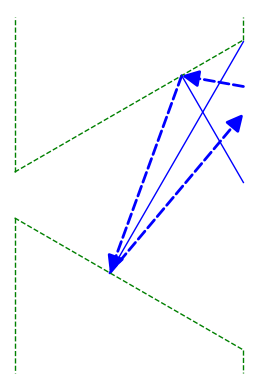

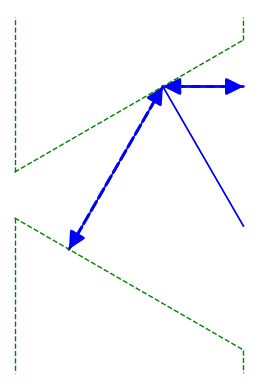

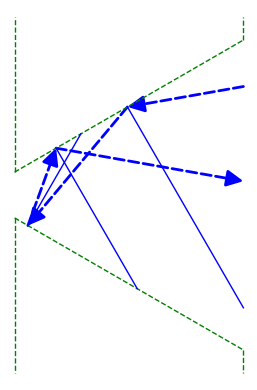

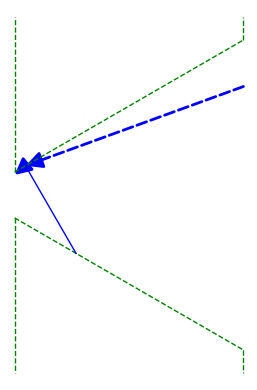

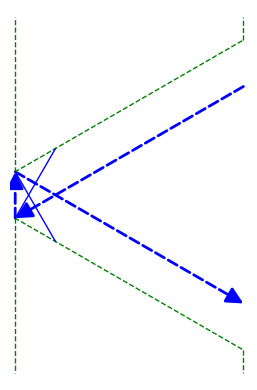

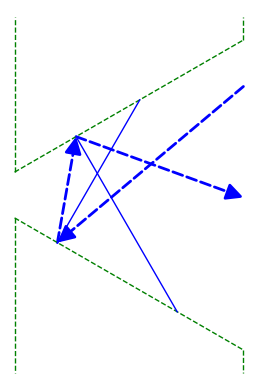

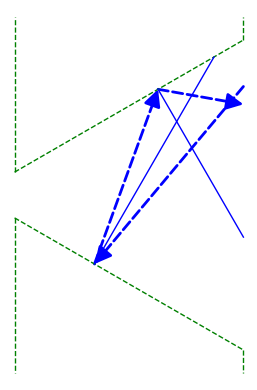

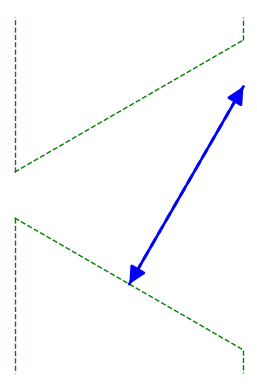

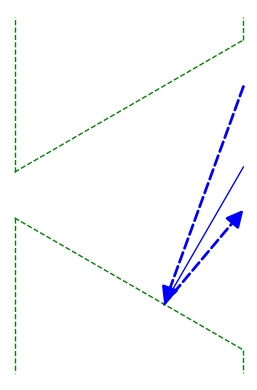

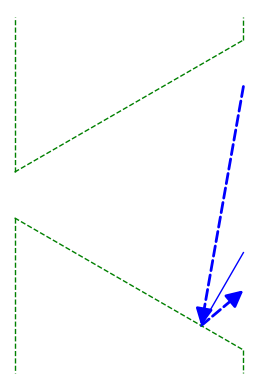

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, 541880215351701/1000000000000000)
intersection_point_in Point2D(1, 541880215351701/1000000000000000)


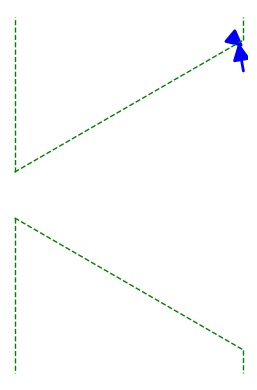

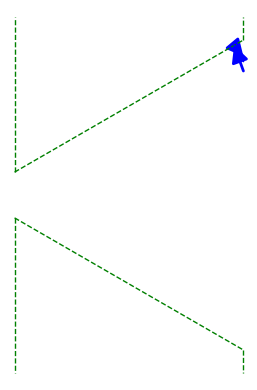

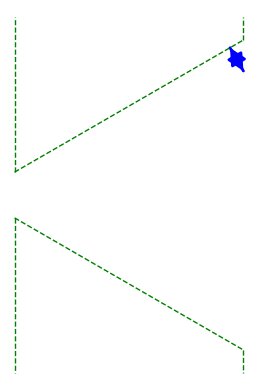

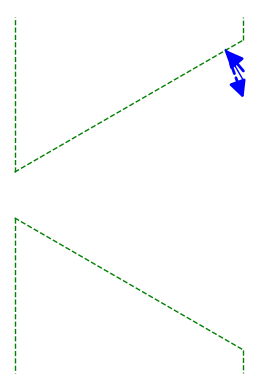

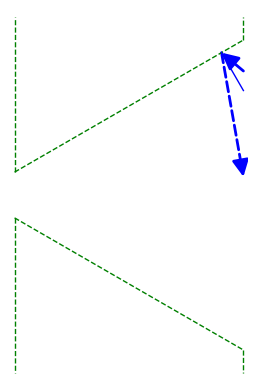

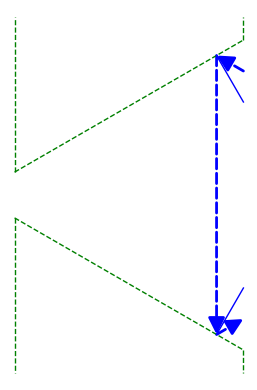

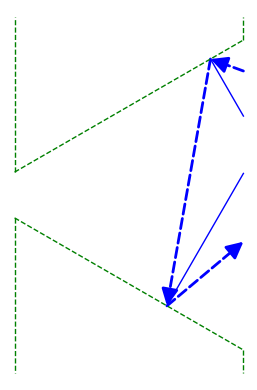

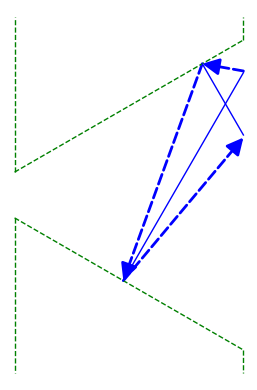

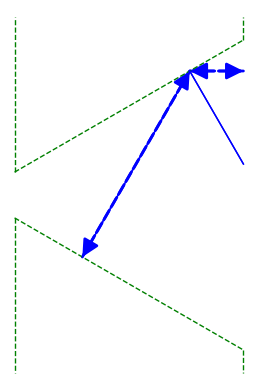

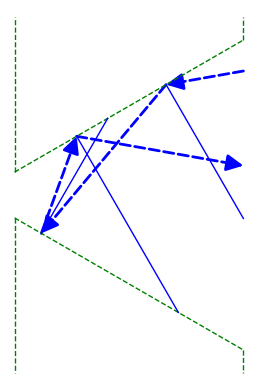

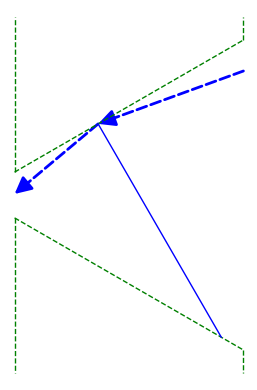

traj_ray.source Point2D(1, 541880215351701/1000000000000000)
intersection_point_in Point2D(1, 541880215351701/1000000000000000)


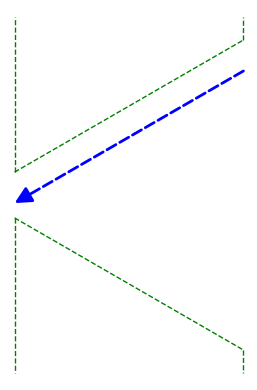

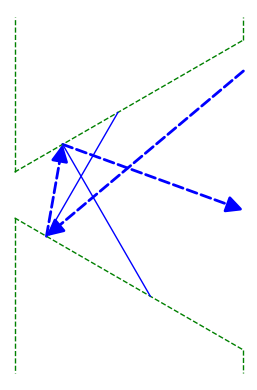

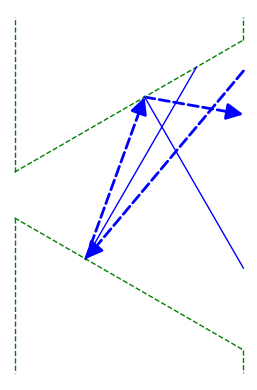

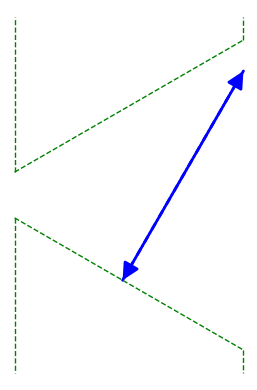

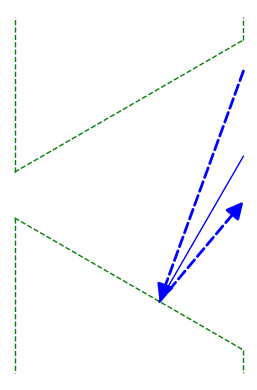

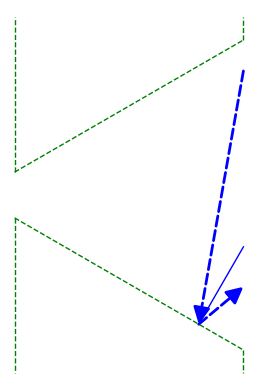

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, 609615242270663/1000000000000000)
intersection_point_in Point2D(1, 609615242270663/1000000000000000)


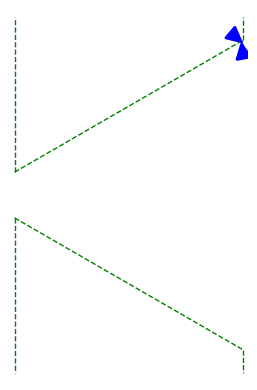

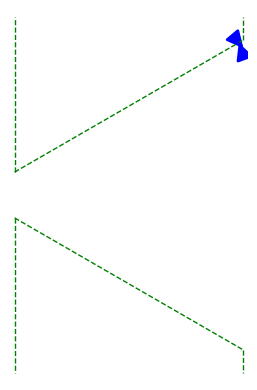

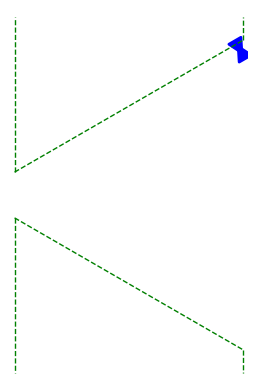

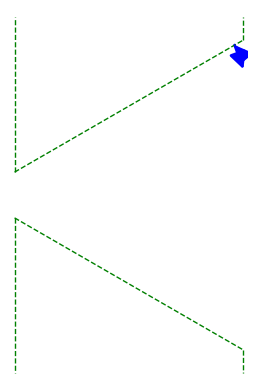

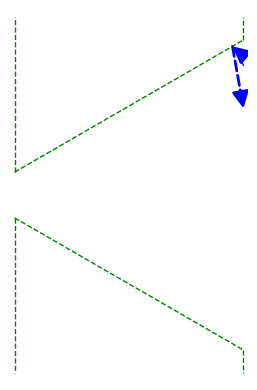

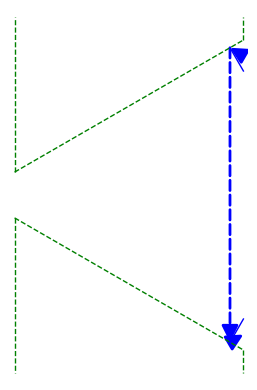

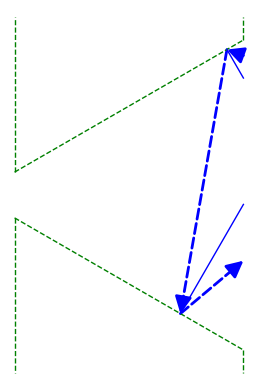

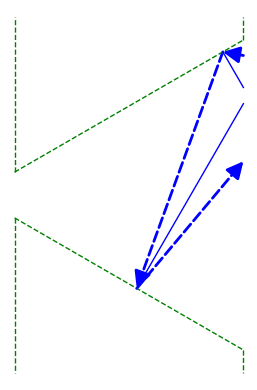

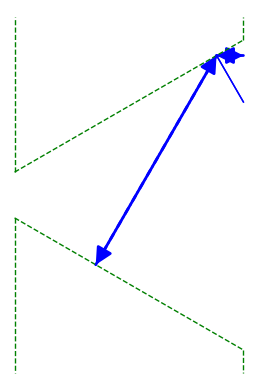

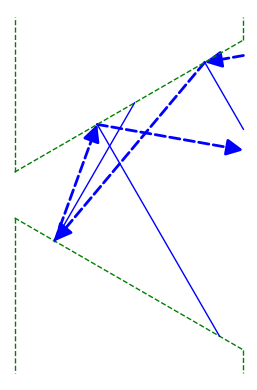

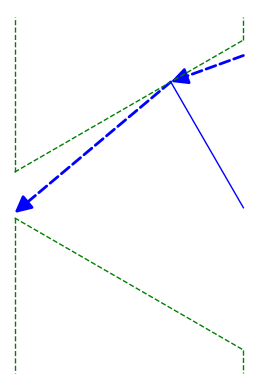

traj_ray.source Point2D(1, 609615242270663/1000000000000000)
intersection_point_in Point2D(1, 609615242270663/1000000000000000)


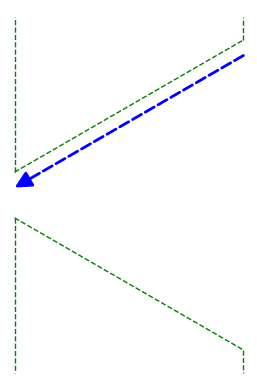

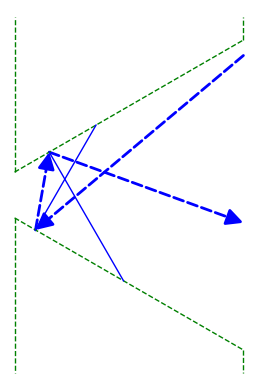

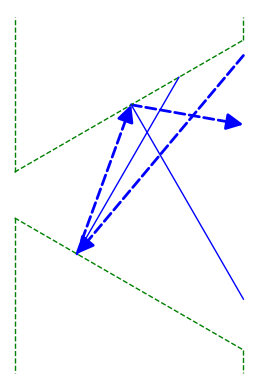

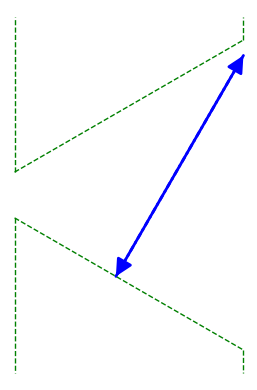

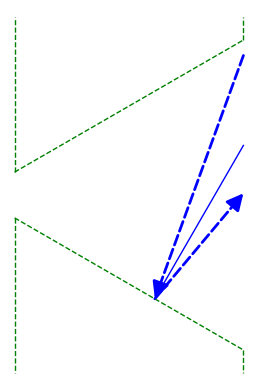

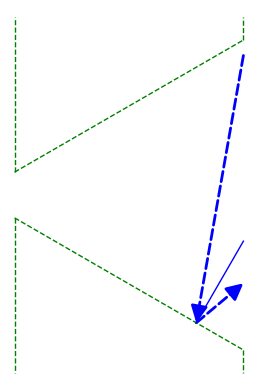

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)
traj_ray.source Point2D(1, 338675134594813/500000000000000)
intersection_point_in Point2D(1, 338675134594813/500000000000000)
traj_ray.source Point2D(1, 338675134594813/500000000000000)
intersection_point_in Point2D(1, 338675134594813/500000000000000)
traj_ray.source Point2D(1, 338675134594813/500000000000000)
intersection_point_in Point2D(1, 338675134594813/500000000000000)
traj_ray.source Point2D(1, 338675134594813/500000000000000)
intersection_point_in Point2D(1, 338675134594813/500000000000000)
traj_ray.source Point2D(1, 338675134594813/500000000000000)
intersection_point_in Point2D(1, 338675134594813/500000000000000)
traj_ray.source Point2D(1, 338675134594813/500000000000000)
intersection_point_in Point2D(1, 338675134594813/500000000000000)
traj_ray.source Point2D(1, 338675134594813/500000000000000)
intersection_point_in Point2D(1, 338675134594813/5000000

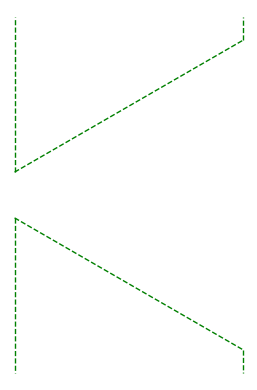

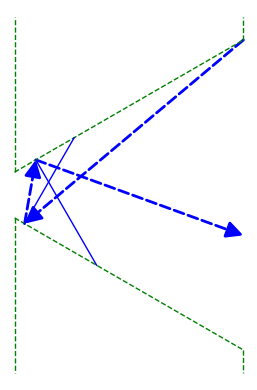

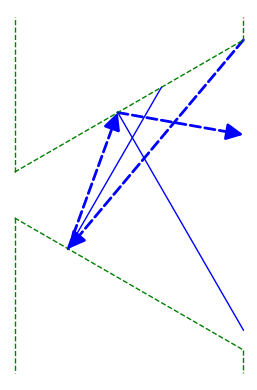

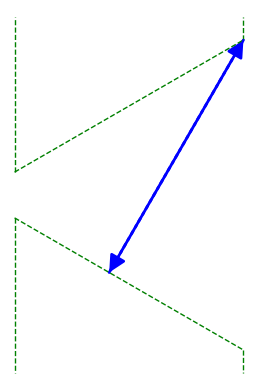

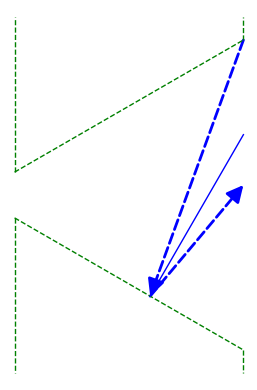

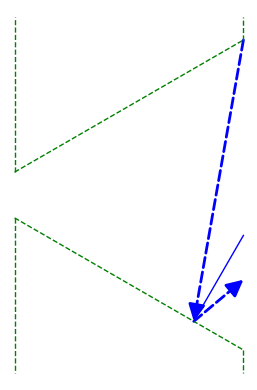

traj_ray.source Point2D(1, -338675134594813/500000000000000)
intersection_point_in Point2D(1, -338675134594813/500000000000000)


In [25]:
if make_investigation_plots:
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    alpha_ = pi/6

    y_linspace = np.linspace(-(r + d * tan(alpha_)).n(), (r + d * tan(alpha_)).n(), 21)

    ang_linspace = np.linspace((pi/2).n(), (pi+pi/2).n(), 19)

    y_list = y_linspace.tolist()
    ang_list = ang_linspace.tolist()

    y_grid,ang_grid = np.meshgrid(y_linspace, ang_linspace)

    u = y_grid * np.nan
    v = y_grid * np.nan

    for iy in np.arange(0, len(y_linspace), 1):
        for iang in np.arange(0, len(ang_linspace), 1):
            y = y_list[iy]
            ang = ang_list[iang]
            try:
                plt, u[iang][iy] = integrand (alpha=alpha_, y = y, ang = ang)
                frames += [plt]
            except:
                pass

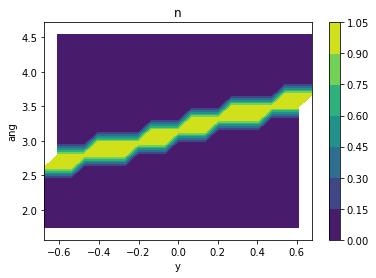

In [7]:
if make_investigation_plots:
    fig,ax=plt.subplots(1,1)

    cp = ax.contourf(y_grid,ang_grid, u)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('n')
    ax.set_xlabel('y')
    ax.set_ylabel('ang')
    plt.show()

In [8]:
y_linspace

array([-6.77350269e-01, -6.09615242e-01, -5.41880215e-01, -4.74145188e-01,
       -4.06410162e-01, -3.38675135e-01, -2.70940108e-01, -2.03205081e-01,
       -1.35470054e-01, -6.77350269e-02,  1.11022302e-16,  6.77350269e-02,
        1.35470054e-01,  2.03205081e-01,  2.70940108e-01,  3.38675135e-01,
        4.06410162e-01,  4.74145188e-01,  5.41880215e-01,  6.09615242e-01,
        6.77350269e-01])

In [9]:
ang_linspace

array([1.57079633, 1.74532925, 1.91986218, 2.0943951 , 2.26892803,
       2.44346095, 2.61799388, 2.7925268 , 2.96705973, 3.14159265,
       3.31612558, 3.4906585 , 3.66519143, 3.83972435, 4.01425728,
       4.1887902 , 4.36332313, 4.53785606, 4.71238898])

In [ ]:
a = animate(frames, aspect_ratio=1)#, xmin = -, xmax = +, ymin = -, ymax = +)

In [ ]:
a.show(use_ffmpeg=True)

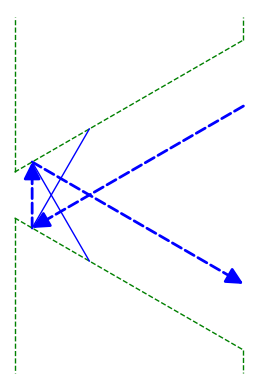

In [10]:
calc_float = True
alpha_=pi/6
p1 = (d,  (r + d * tan(alpha_)/2))
traj_ray_1 = Ray(p1, angle = pi+pi/3/2)
plt, n = draw_wedge(alpha=alpha_, traj_ray_1=traj_ray_1)
plt.show(aspect_ratio = 1, axes=False)

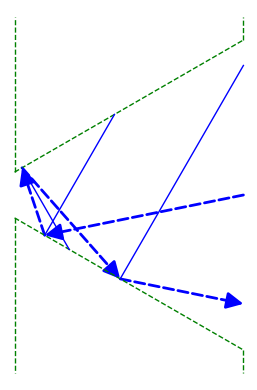

0

In [11]:
integrand (alpha=pi/6, y = 0, ang = pi/2+pi/2+0.2)

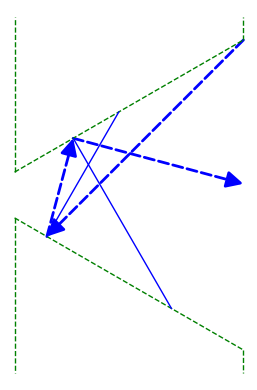

In [12]:
alpha_=pi/6
p1 = (d,  (r + d * tan(alpha_)).n())
p2 = (0, -r)
traj_ray_1 = Ray(p1, p2)
traj_ray_1 = Ray(p1, angle = pi+pi/4)
plt, n = draw_wedge(alpha_, traj_ray_1)
plt.show(aspect_ratio = 1, axes=False)

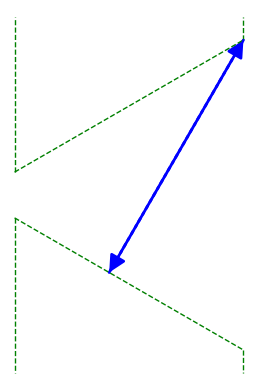

In [13]:
calc_float = True
traj_ray_1 = Ray(p1, angle = pi+pi/3)
plt, n = draw_wedge(alpha_, traj_ray_1)
plt.show(aspect_ratio = 1, axes=False)

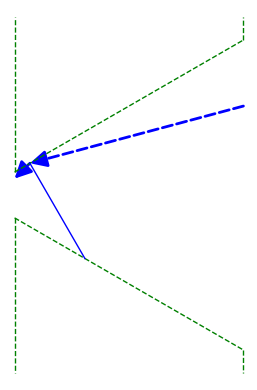

In [14]:
alpha_=pi/6
p1 = (d,  (r + d * tan(alpha_)/2))
traj_ray_1 = Ray(p1, angle = pi+pi/6/2)

plt, n = draw_wedge(alpha_, traj_ray_1)
plt.show(aspect_ratio = 1, axes=False)